In [1]:
import pandas as pd
import numpy as np

In [2]:

file_path = "/Users/sandyajaleshkumar/Desktop/Data Analytics & Data Mining/Assignment/Datasets/fraudTrain.csv"
df = pd.read_csv(file_path)

In [3]:
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
df_head = df.head()
df_head


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
df_shape = df.shape
df_shape

(1296675, 23)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [9]:

columns = df.columns
class_distribution = df['is_fraud'].value_counts(normalize=True) * 100

columns, class_distribution

(Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
        'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
        'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
        'merch_lat', 'merch_long', 'is_fraud'],
       dtype='object'),
 is_fraud
 0    99.421135
 1     0.578865
 Name: proportion, dtype: float64)

Calculates rolling 7-day transaction count and amount sum for each card based on transaction timestamps.

In [11]:

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df.sort_values(by=['cc_num', 'trans_date_trans_time'], inplace=True)

df['rolling_txn_count_7d'] = 0
df['rolling_amt_sum_7d'] = 0.0

results = []

for cc, group in df.groupby('cc_num'):
    group = group.set_index('trans_date_trans_time')
    group = group.sort_index()
    group['rolling_txn_count_7d'] = group['amt'].rolling('7d').count()
    group['rolling_amt_sum_7d'] = group['amt'].rolling('7d').sum()
    results.append(group)

df_rolled = pd.concat(results).reset_index()
df = df_rolled

df[['cc_num', 'trans_date_trans_time', 'rolling_txn_count_7d', 'rolling_amt_sum_7d']].head()

,cc_num,trans_date_trans_time,rolling_txn_count_7d,rolling_amt_sum_7d
0,60416207185,2019-01-01 12:47:15,1.0,7.27
1,60416207185,2019-01-02 08:44:57,2.0,60.21
2,60416207185,2019-01-02 08:47:36,3.0,142.29
3,60416207185,2019-01-02 12:38:14,4.0,177.08
4,60416207185,2019-01-02 13:10:46,5.0,204.26


Extracts date and time features from transaction timestamps and calculates the number of transactions per card per day, week, and month.

In [13]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_date'] = df['trans_date_trans_time'].dt.date

df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['week'] = df['trans_date_trans_time'].dt.strftime('%Y-%U')  # year-week number
df['month'] = df['trans_date_trans_time'].dt.to_period('M')

daily_count = df.groupby(['cc_num', 'trans_date']).size().reset_index(name='txn_count_per_day')
weekly_count = df.groupby(['cc_num', 'week']).size().reset_index(name='txn_count_per_week')
monthly_count = df.groupby(['cc_num', 'month']).size().reset_index(name='txn_count_per_month')


df = df.merge(daily_count, on=['cc_num', 'trans_date'], how='left')
df = df.merge(weekly_count, on=['cc_num', 'week'], how='left')
df = df.merge(monthly_count, on=['cc_num', 'month'], how='left')


df[['cc_num', 'trans_date', 'week', 'month', 'txn_count_per_day', 'txn_count_per_week', 'txn_count_per_month']].head()


,cc_num,trans_date,week,month,txn_count_per_day,txn_count_per_week,txn_count_per_month
0,60416207185,2019-01-01,2019-00,2019-01,1,11,56
1,60416207185,2019-01-02,2019-00,2019-01,4,11,56
2,60416207185,2019-01-02,2019-00,2019-01,4,11,56
3,60416207185,2019-01-02,2019-00,2019-01,4,11,56
4,60416207185,2019-01-02,2019-00,2019-01,4,11,56


Converts date of birth to datetime and calculates the age of the cardholder at the time of the transaction.

In [17]:
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year
df


,trans_date_trans_time,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,...,trans_date,hour,day,day_of_week,week,month,txn_count_per_day,txn_count_per_week,txn_count_per_month,age
0,2019-01-01 12:47:15,1017,60416207185,"fraud_Jones, Sawayn and Romaguera",misc_net,7.27,Mary,Diaz,F,9886 Anita Drive,...,2019-01-01,12,1,1,2019-00,2019-01,1,11,56,33
1,2019-01-02 08:44:57,2724,60416207185,fraud_Berge LLC,gas_transport,52.94,Mary,Diaz,F,9886 Anita Drive,...,2019-01-02,8,2,2,2019-00,2019-01,4,11,56,33
2,2019-01-02 08:47:36,2726,60416207185,fraud_Luettgen PLC,gas_transport,82.08,Mary,Diaz,F,9886 Anita Drive,...,2019-01-02,8,2,2,2019-00,2019-01,4,11,56,33
3,2019-01-02 12:38:14,2882,60416207185,fraud_Daugherty LLC,kids_pets,34.79,Mary,Diaz,F,9886 Anita Drive,...,2019-01-02,12,2,2,2019-00,2019-01,4,11,56,33
4,2019-01-02 13:10:46,2907,60416207185,fraud_Beier and Sons,home,27.18,Mary,Diaz,F,9886 Anita Drive,...,2019-01-02,13,2,2,2019-00,2019-01,4,11,56,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-20 21:04:59,1294934,4992346398065154184,"fraud_Berge, Kautzer and Harris",personal_care,60.47,Benjamin,Kim,M,920 Patrick Light,...,2020-06-20,21,20,5,2020-24,2020-06,4,29,90,64
1296671,2020-06-21 00:41:01,1295369,4992346398065154184,fraud_Bernhard Inc,gas_transport,74.29,Benjamin,Kim,M,920 Patrick Light,...,2020-06-21,0,21,6,2020-25,2020-06,4,4,90,64
1296672,2020-06-21 02:47:59,1295587,4992346398065154184,"fraud_Reichert, Rowe and Mraz",shopping_net,246.56,Benjamin,Kim,M,920 Patrick Light,...,2020-06-21,2,21,6,2020-25,2020-06,4,4,90,64
1296673,2020-06-21 08:04:28,1296206,4992346398065154184,fraud_Jewess LLC,shopping_pos,2.62,Benjamin,Kim,M,920 Patrick Light,...,2020-06-21,8,21,6,2020-25,2020-06,4,4,90,64


Creates new features: whether the transaction was on a weekend or at night, 
and calculates the distance between user and merchant using the Haversine formula.


In [22]:
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

df['is_night'] = df['hour'].between(0, 6).astype(int)

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

df['distance_to_merchant'] = haversine(df['lat'], df['long'], df['merch_lat'], df['merch_long'])

df[['hour', 'day_of_week', 'is_weekend', 'is_night', 'distance_to_merchant']].head()


,hour,day_of_week,is_weekend,is_night,distance_to_merchant
0,12,1,0,0,127.606239
1,8,2,0,0,110.308921
2,8,2,0,0,21.787261
3,12,2,0,0,87.204215
4,13,2,0,0,74.212965


Calculates average and standard deviation of transaction amounts per card, 
then computes the z-score to measure how unusual each transaction is.


In [24]:
card_stats = df.groupby('cc_num')['amt'].agg(
    avg_amt_per_card='mean',
    std_amt_per_card='std'
).reset_index()

df = df.merge(card_stats, on='cc_num', how='left')

epsilon = 1e-3
df['std_amt_per_card'].replace(0, epsilon, inplace=True)

df['z_score_amt_per_card'] = (df['amt'] - df['avg_amt_per_card']) / df['std_amt_per_card']

df[['cc_num', 'amt', 'avg_amt_per_card', 'std_amt_per_card', 'z_score_amt_per_card']].head()


/var/folders/x0/50_cl34x1zg9wnnjkygh0svc0000gn/T/ipykernel_76814/923703010.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['std_amt_per_card'].replace(0, epsilon, inplace=True)


,cc_num,amt,avg_amt_per_card,std_amt_per_card,z_score_amt_per_card
0,60416207185,7.27,56.023366,122.632635,-0.397556
1,60416207185,52.94,56.023366,122.632635,-0.025143
2,60416207185,82.08,56.023366,122.632635,0.212477
3,60416207185,34.79,56.023366,122.632635,-0.173146
4,60416207185,27.18,56.023366,122.632635,-0.235201


Calculates time since the last transaction for each card and adds the total number of transactions per merchant.

In [30]:

df.sort_values(by=['cc_num', 'trans_date_trans_time'], inplace=True)
df['time_since_last_txn'] = df.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds().fillna(0)

merchant_txn_count = df['merchant'].value_counts().to_dict()
df['merchant_txn_count'] = df['merchant'].map(merchant_txn_count)

Categorizes transaction amounts into buckets and adds fraud rate by state and job as new features.

In [33]:

df['amt_bucket'] = pd.cut(
    df['amt'],
    bins=[-1, 10, 100, 500, 1000, 5000, float('inf')],
    labels=['very_low', 'low', 'medium', 'high', 'very_high', 'extreme']
)

state_fraud_rate = df.groupby('state')['is_fraud'].mean().to_dict()
df['state_fraud_rate'] = df['state'].map(state_fraud_rate)

job_fraud_rate = df.groupby('job')['is_fraud'].mean().to_dict()
df['job_fraud_rate'] = df['job'].map(job_fraud_rate)


Calculates rolling 7-day transaction count and amount sum for each card based on transaction timestamps.

In [36]:

df['trans_date'] = pd.to_datetime(df['trans_date'])
df.sort_values(by=['cc_num', 'trans_date'], inplace=True)

df['rolling_txn_count_7d'] = 0
df['rolling_amt_sum_7d'] = 0.0

results = []

for cc, group in df.groupby('cc_num'):
    group = group.set_index('trans_date')
    group = group.sort_index()
    group['rolling_txn_count_7d'] = group['amt'].rolling('7d').count()
    group['rolling_amt_sum_7d'] = group['amt'].rolling('7d').sum()
    results.append(group)

df_rolled = pd.concat(results).reset_index()

df = df_rolled

df[['cc_num', 'trans_date', 'rolling_txn_count_7d', 'rolling_amt_sum_7d']].head()

,cc_num,trans_date,rolling_txn_count_7d,rolling_amt_sum_7d
0,60416207185,2019-01-01,1.0,7.27
1,60416207185,2019-01-02,2.0,60.21
2,60416207185,2019-01-02,3.0,142.29
3,60416207185,2019-01-02,4.0,177.08
4,60416207185,2019-01-02,5.0,204.26


In [39]:
monthly_group = df.groupby(['cc_num', 'month'])['amt']
df['monthly_avg_amt'] = monthly_group.transform('mean')
df['monthly_std_amt'] = monthly_group.transform('std')

df['monthly_z_score_amt'] = (df['amt'] - df['monthly_avg_amt']) / df['monthly_std_amt']
df['monthly_z_score_amt'] = df['monthly_z_score_amt'].fillna(0)

df[['cc_num', 'trans_date_trans_time', 'amt', 'monthly_avg_amt', 'monthly_std_amt', 'monthly_z_score_amt']].head()

,cc_num,trans_date_trans_time,amt,monthly_avg_amt,monthly_std_amt,monthly_z_score_amt
0,60416207185,2019-01-01 12:47:15,7.27,43.045357,48.703648,-0.734552
1,60416207185,2019-01-02 08:44:57,52.94,43.045357,48.703648,0.203160
2,60416207185,2019-01-02 08:47:36,82.08,43.045357,48.703648,0.801473
3,60416207185,2019-01-02 12:38:14,34.79,43.045357,48.703648,-0.169502
4,60416207185,2019-01-02 13:10:46,27.18,43.045357,48.703648,-0.325753


In [40]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 49 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date             1296675 non-null  datetime64[ns]
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   Unnamed: 0             1296675 non-null  int64         
 3   cc_num                 1296675 non-null  int64         
 4   merchant               1296675 non-null  object        
 5   category               1296675 non-null  object        
 6   amt                    1296675 non-null  float64       
 7   first                  1296675 non-null  object        
 8   last                   1296675 non-null  object        
 9   gender                 1296675 non-null  object        
 10  street                 1296675 non-null  object        
 11  city                   1296675 non-null  object        
 12  state                  12966

In [41]:
columns_to_drop = [
    'Unnamed: 0', 'first', 'last', 'street', 'city', 'zip', 'dob', 'trans_num', 'unix_time',
    'lat', 'long', 'merch_lat', 'merch_long', 'trans_date', 'week', 'month'
]

df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)


In [43]:


columns_to_drop = [
    'Unnamed: 0', 'first', 'last', 'street', 'city', 'zip', 'dob',
    'trans_num', 'unix_time', 'lat', 'long', 'merch_lat', 'merch_long',
    'trans_date', 'week', 'month'
]

ndf = df.drop(columns=[col for col in columns_to_drop if col in df.columns]).copy()

EDA (Exploratory Data Analysis)

/var/folders/x0/50_cl34x1zg9wnnjkygh0svc0000gn/T/ipykernel_76814/4070612165.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=ndf, palette='viridis')


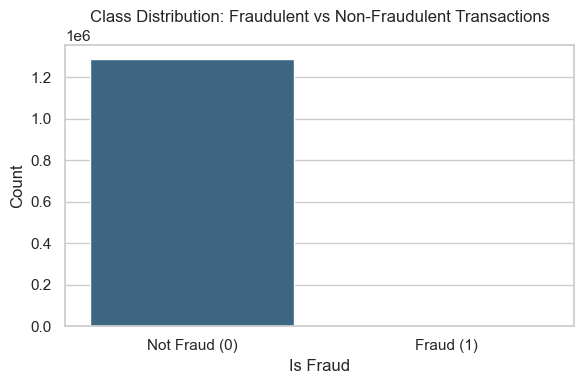

0.5788651743883394

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=ndf, palette='viridis')
plt.title('Class Distribution: Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
plt.tight_layout()
plt.show()

fraud_percent = ndf['is_fraud'].mean() * 100
fraud_percent


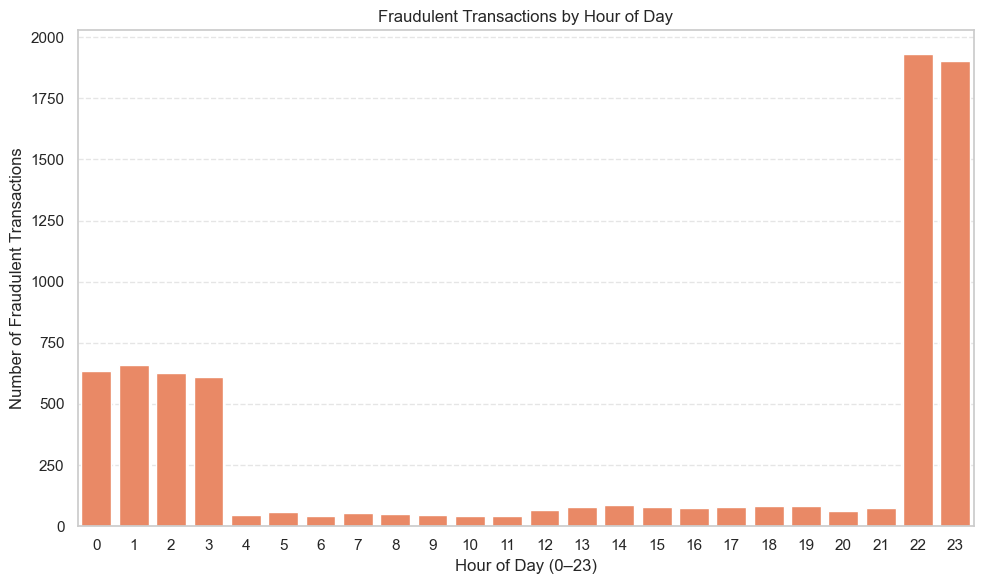

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

fraud_by_hour = ndf_encoded[ndf_encoded['is_fraud'] == 1]['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_by_hour.index, y=fraud_by_hour.values, color='coral')

plt.title('Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Fraudulent Transactions')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("/Users/sandyajaleshkumar/Desktop/hour_of_day_vs_fraud.png", dpi=300)
plt.show()


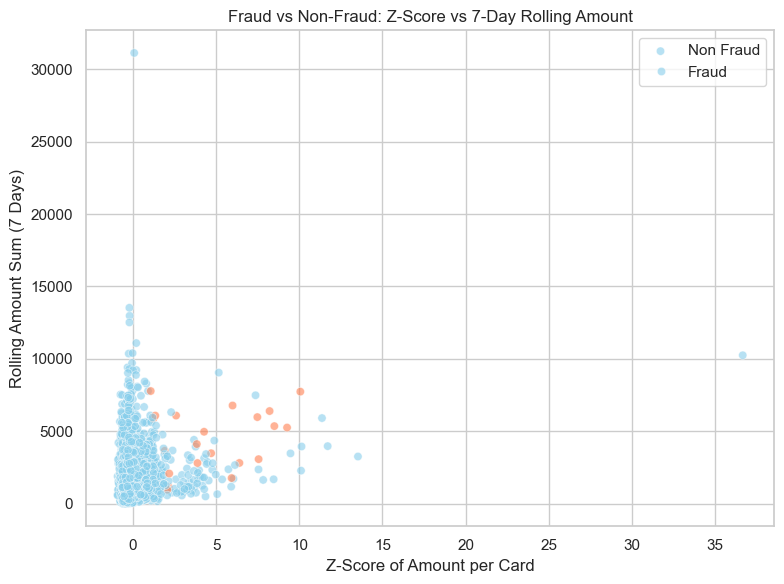

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sampled = ndf.sample(5000, random_state=42)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=sampled,
    x='z_score_amt_per_card',
    y='rolling_amt_sum_7d',
    hue='is_fraud',
    palette={0: 'skyblue', 1: 'coral'},
    alpha=0.6
)

plt.title("Fraud vs Non-Fraud: Z-Score vs 7-Day Rolling Amount")
plt.xlabel("Z-Score of Amount per Card")
plt.ylabel("Rolling Amount Sum (7 Days)")
plt.legend(title='', labels=['Non Fraud', 'Fraud'])
plt.tight_layout()
plt.show()


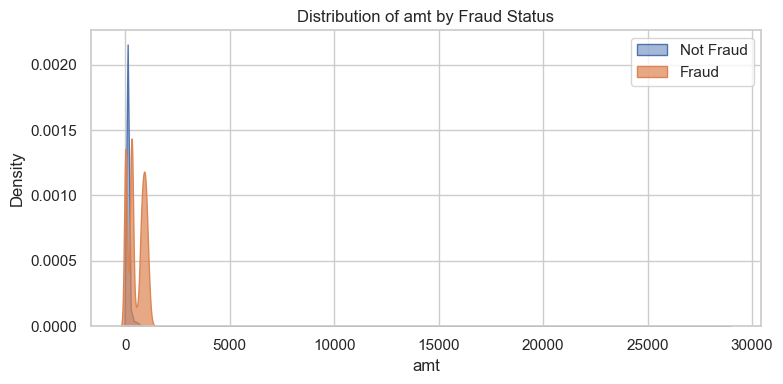

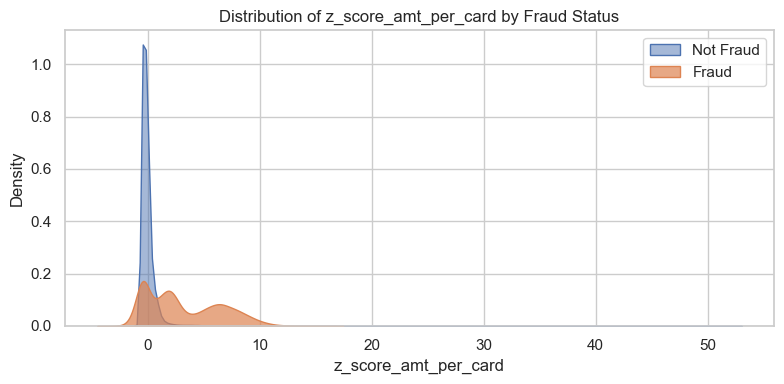

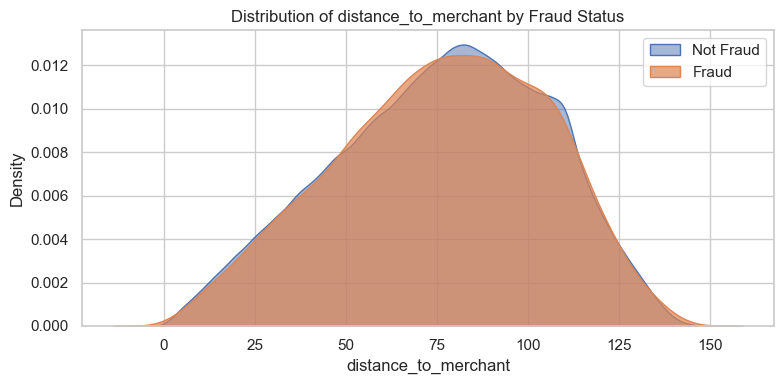

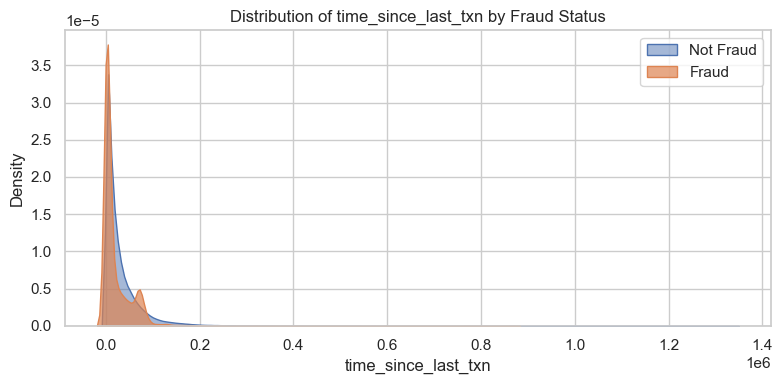

In [47]:
features_to_plot = ['amt', 'z_score_amt_per_card', 'distance_to_merchant', 'time_since_last_txn']

for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df[df['is_fraud'] == 0], x=feature, label='Not Fraud', fill=True, alpha=0.5)
    sns.kdeplot(data=df[df['is_fraud'] == 1], x=feature, label='Fraud', fill=True, alpha=0.7)
    plt.title(f'Distribution of {feature} by Fraud Status')
    plt.legend()
    plt.tight_layout()
    plt.show()



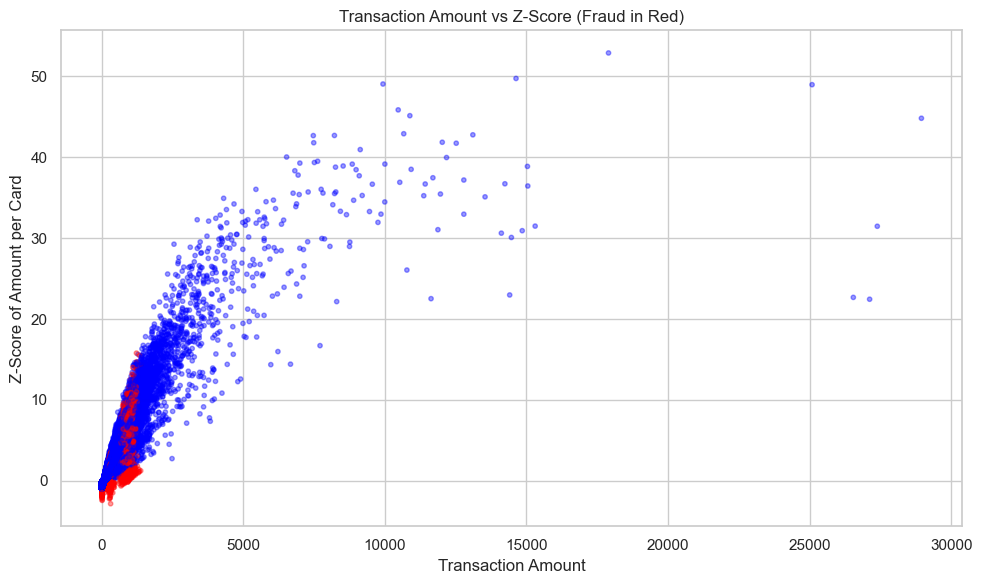

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
colors = df['is_fraud'].map({0: 'blue', 1: 'red'})

plt.scatter(df['amt'], df['z_score_amt_per_card'], c=colors, alpha=0.4, s=10)
plt.xlabel('Transaction Amount')
plt.ylabel('Z-Score of Amount per Card')
plt.title('Transaction Amount vs Z-Score (Fraud in Red)')
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/x0/50_cl34x1zg9wnnjkygh0svc0000gn/T/ipykernel_76814/1837291506.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_merchants.values, y=top_merchants.index, palette='flare')


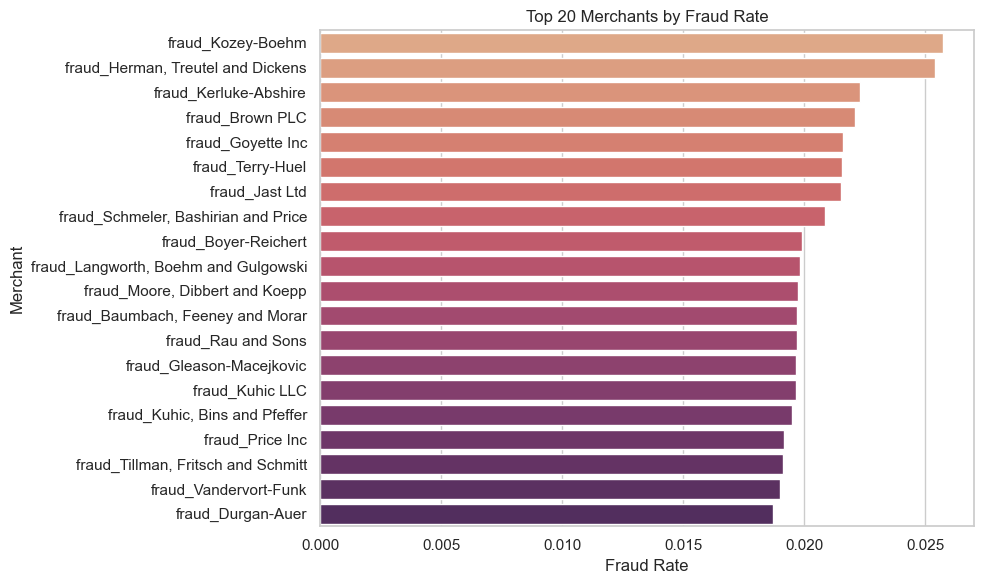

In [49]:
merchant_fraud_rate = df.groupby('merchant')['is_fraud'].mean().sort_values(ascending=False)

top_merchants = merchant_fraud_rate.head(20)


plt.figure(figsize=(10, 6))
sns.barplot(x=top_merchants.values, y=top_merchants.index, palette='flare')
plt.title('Top 20 Merchants by Fraud Rate')
plt.xlabel('Fraud Rate')
plt.ylabel('Merchant')
plt.tight_layout()
plt.show()

/var/folders/x0/50_cl34x1zg9wnnjkygh0svc0000gn/T/ipykernel_76814/2360860736.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_fraud_rate.index, y=category_fraud_rate.values, palette='mako')


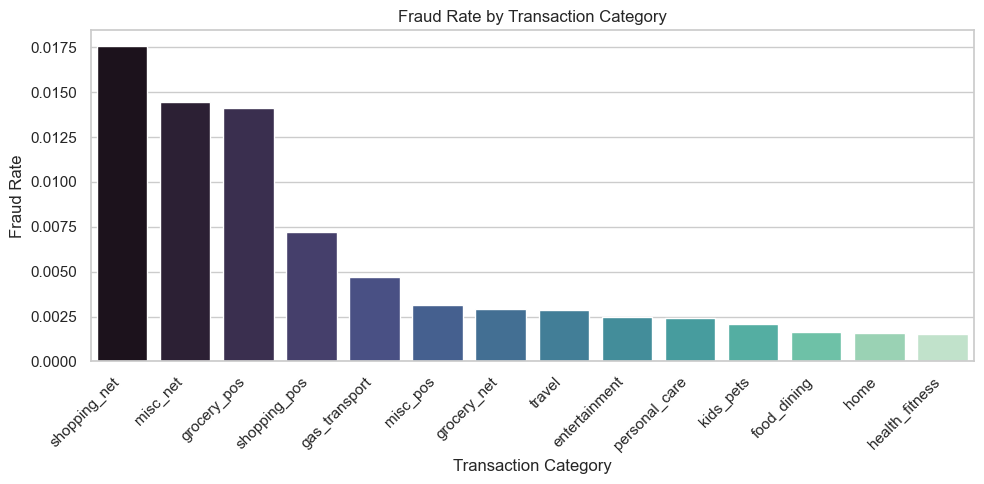

In [50]:

category_fraud_rate = df.groupby('category')['is_fraud'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=category_fraud_rate.index, y=category_fraud_rate.values, palette='mako')
plt.title('Fraud Rate by Transaction Category')
plt.ylabel('Fraud Rate')
plt.xlabel('Transaction Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

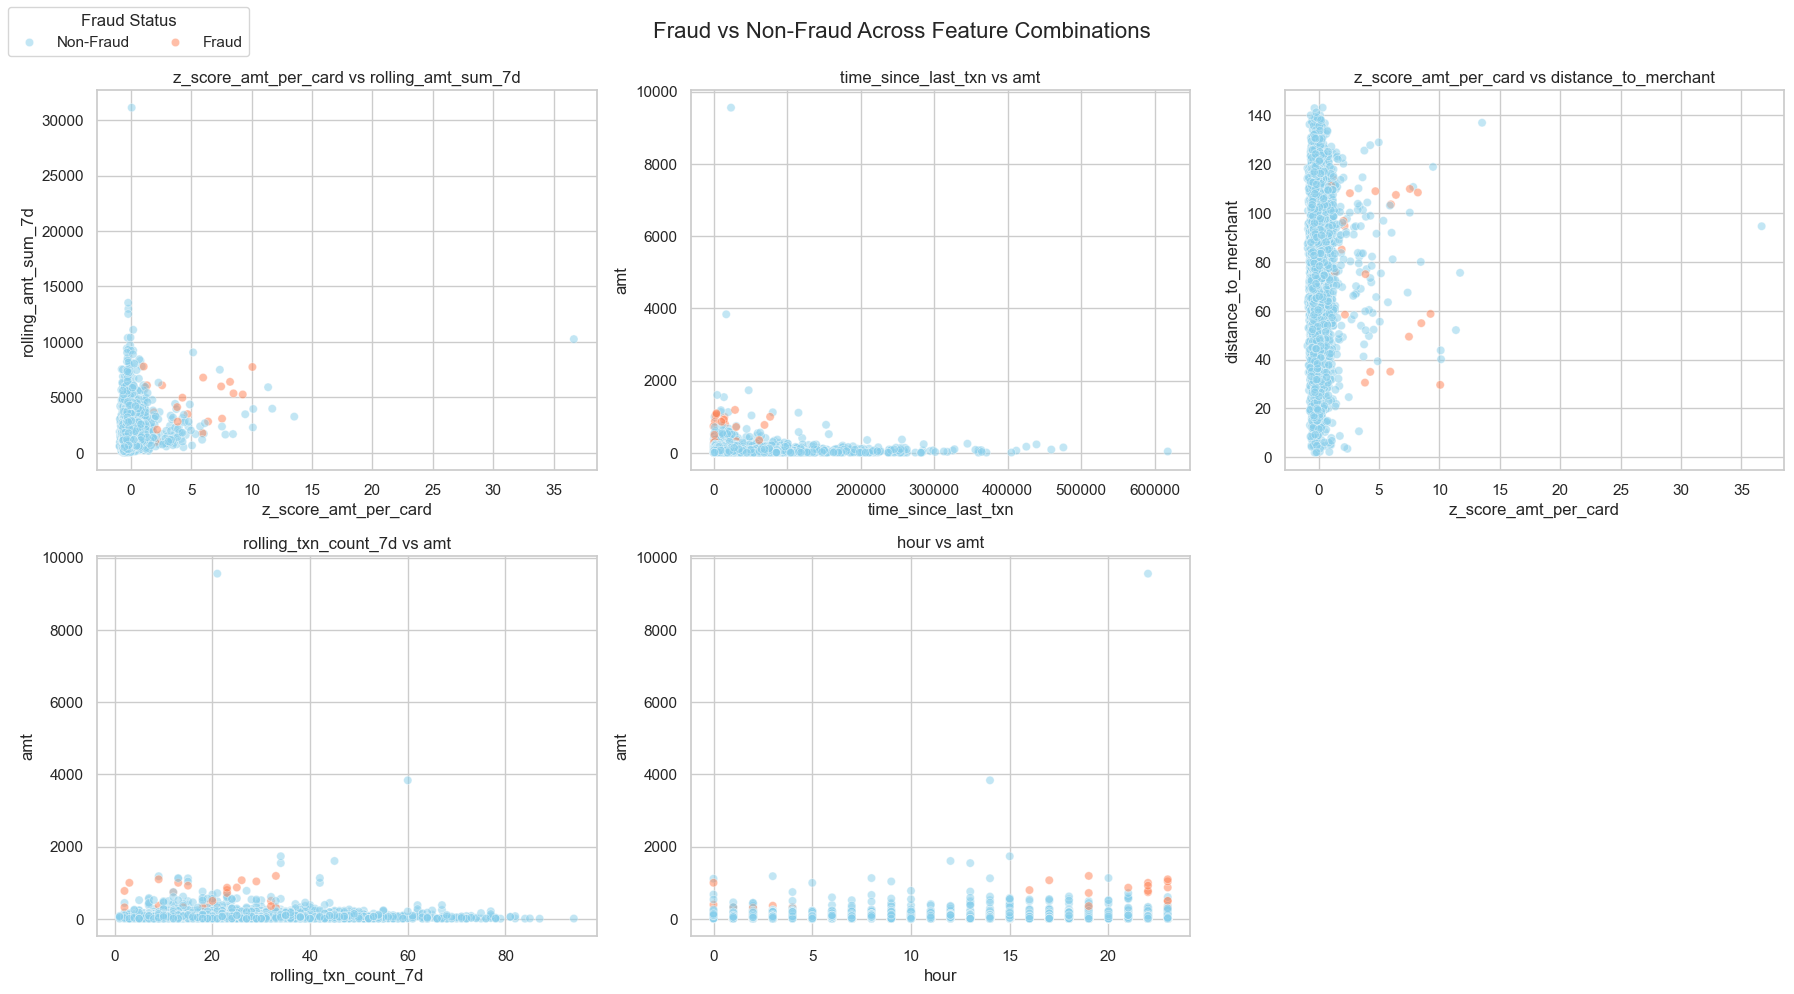

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

sampled = ndf.sample(5000, random_state=42)

feature_combos = [
    ('z_score_amt_per_card', 'rolling_amt_sum_7d'),
    ('time_since_last_txn', 'amt'),
    ('z_score_amt_per_card', 'distance_to_merchant'),
    ('rolling_txn_count_7d', 'amt'),
    ('hour', 'amt')
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (x_feat, y_feat) in enumerate(feature_combos):
    plot = sns.scatterplot(
        data=sampled,
        x=x_feat,
        y=y_feat,
        hue='is_fraud',
        palette={0: 'skyblue', 1: 'coral'},
        alpha=0.5,
        ax=axes[i]
    )
    axes[i].set_title(f'{x_feat} vs {y_feat}')
    axes[i].set_xlabel(x_feat)
    axes[i].set_ylabel(y_feat)

if len(feature_combos) < len(axes):
    axes[-1].axis('off')

handles, labels = plot.get_legend_handles_labels()

for ax in axes:
    if ax.get_legend():
        ax.get_legend().remove()

fig.legend(handles, ['Non-Fraud', 'Fraud'], title='Fraud Status', loc='upper left', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Fraud vs Non-Fraud Across Feature Combinations', fontsize=16)
plt.show()


/var/folders/x0/50_cl34x1zg9wnnjkygh0svc0000gn/T/ipykernel_76814/3342325536.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


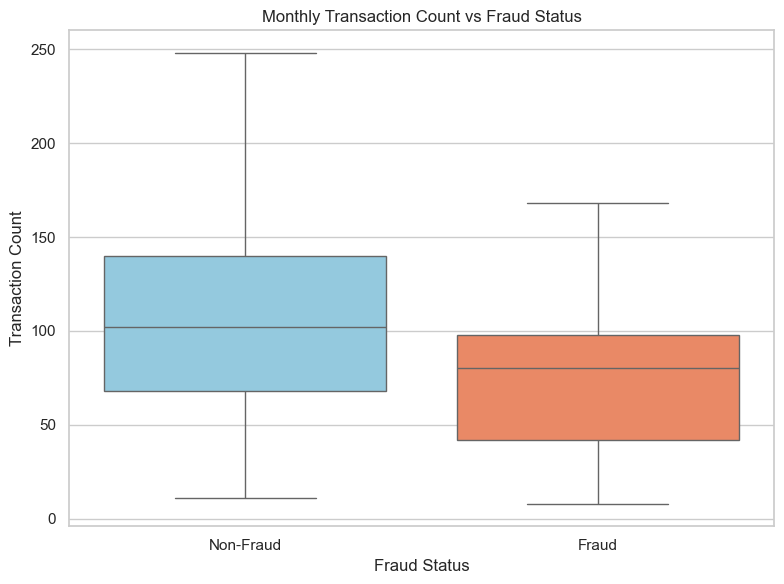

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sampled = ndf.sample(5000, random_state=42)

sampled['is_fraud'] = sampled['is_fraud'].astype(str)

palette = {'0': 'skyblue', '1': 'coral'}

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=sampled,
    x='is_fraud',
    y='txn_count_per_month',
    palette=palette,
    showfliers=False
)

plt.title('Monthly Transaction Count vs Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Transaction Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

plt.tight_layout()
plt.savefig("/Users/sandyajaleshkumar/Desktop/monthly_txn_vs_fraud.png", dpi=300)
plt.show()


/var/folders/x0/50_cl34x1zg9wnnjkygh0svc0000gn/T/ipykernel_76814/3908064592.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/x0/50_cl34x1zg9wnnjkygh0svc0000gn/T/ipykernel_76814/3908064592.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/x0/50_cl34x1zg9wnnjkygh0svc0000gn/T/ipykernel_76814/3908064592.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


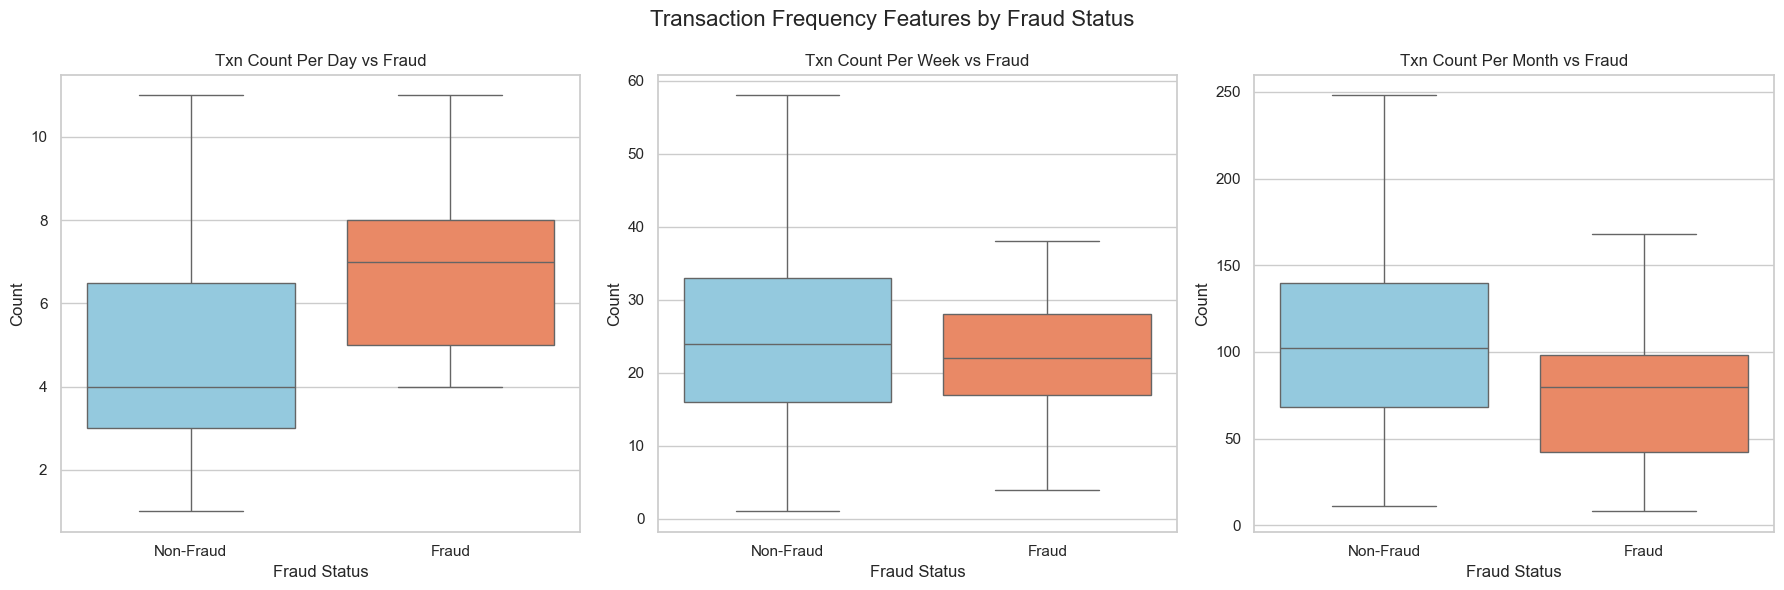

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sampled = ndf.sample(5000, random_state=42)

sampled['is_fraud'] = sampled['is_fraud'].astype(str)

features = ['txn_count_per_day', 'txn_count_per_week', 'txn_count_per_month']
palette = {'0': 'skyblue', '1': 'coral'}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, feature in enumerate(features):
    sns.boxplot(
        data=sampled,
        x='is_fraud',
        y=feature,
        palette=palette,
        ax=axes[i],
        showfliers=False
    )

    axes[i].set_title(f'{feature.replace("_", " ").title()} vs Fraud')
    axes[i].set_xlabel('Fraud Status')
    axes[i].set_ylabel('Count')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['Non-Fraud', 'Fraud'])

plt.suptitle('Transaction Frequency Features by Fraud Status', fontsize=16)
plt.tight_layout()
plt.show()


/var/folders/x0/50_cl34x1zg9wnnjkygh0svc0000gn/T/ipykernel_76814/1342418245.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Non-Fraud', 'Fraud'])
/var/folders/x0/50_cl34x1zg9wnnjkygh0svc0000gn/T/ipykernel_76814/1342418245.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Non-Fraud', 'Fraud'])
/var/folders/x0/50_cl34x1zg9wnnjkygh0svc0000gn/T/ipykernel_76814/1342418245.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Non-Fraud', 'Fraud'])


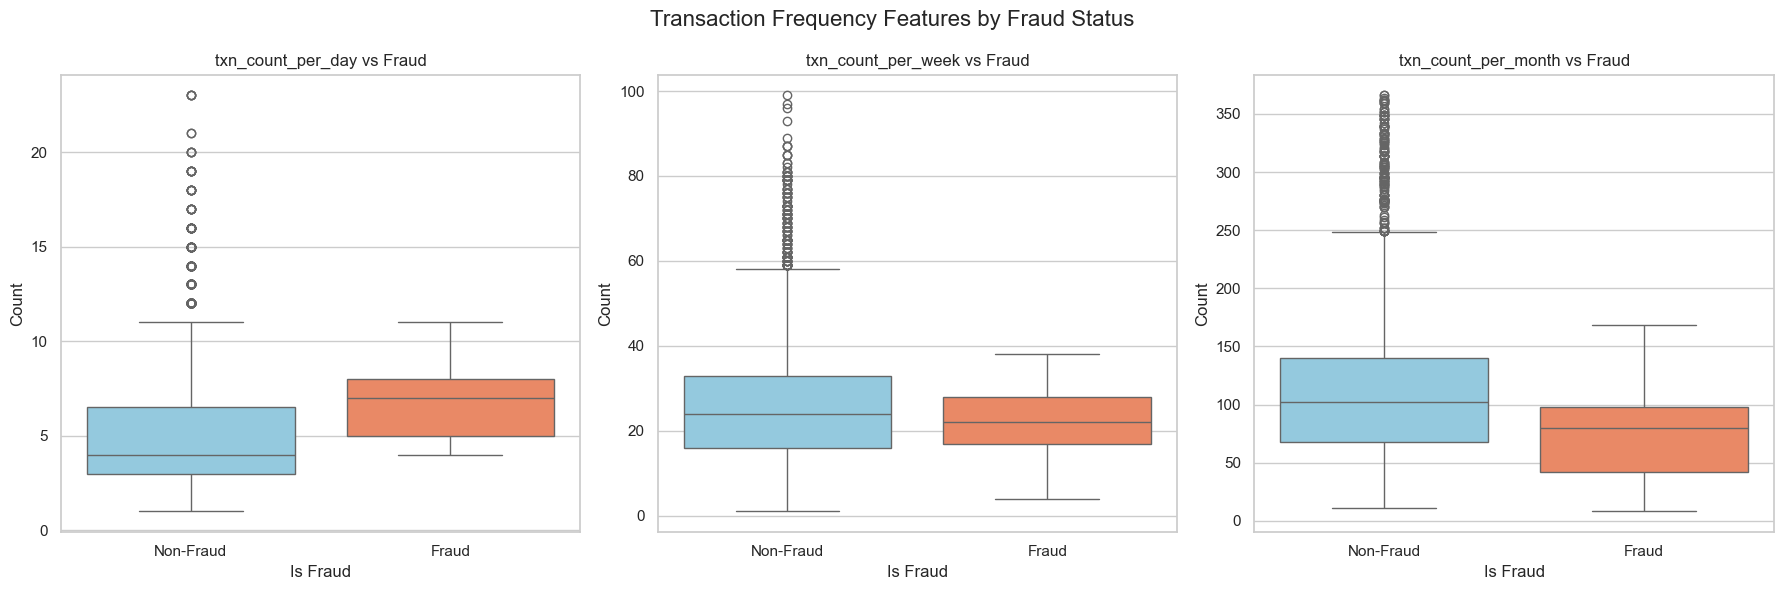

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

sampled = ndf.sample(5000, random_state=42)

sampled['is_fraud'] = sampled['is_fraud'].astype(str)

features = ['txn_count_per_day', 'txn_count_per_week', 'txn_count_per_month']
palette = {'0': 'skyblue', '1': 'coral'}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, feature in enumerate(features):
    sns.boxplot(
        data=sampled,
        x='is_fraud',
        y=feature,
        hue='is_fraud',
        palette=palette,
        ax=axes[i],
        legend=False
    )
    axes[i].set_title(f'{feature} vs Fraud')
    axes[i].set_xlabel('Is Fraud')
    axes[i].set_ylabel('Count')
    axes[i].set_xticklabels(['Non-Fraud', 'Fraud'])

plt.suptitle('Transaction Frequency Features by Fraud Status', fontsize=16)
plt.tight_layout()
plt.show()


/var/folders/x0/50_cl34x1zg9wnnjkygh0svc0000gn/T/ipykernel_76814/1745067283.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Non-Fraud', 'Fraud'])
/var/folders/x0/50_cl34x1zg9wnnjkygh0svc0000gn/T/ipykernel_76814/1745067283.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Non-Fraud', 'Fraud'])
/var/folders/x0/50_cl34x1zg9wnnjkygh0svc0000gn/T/ipykernel_76814/1745067283.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Non-Fraud', 'Fraud'])


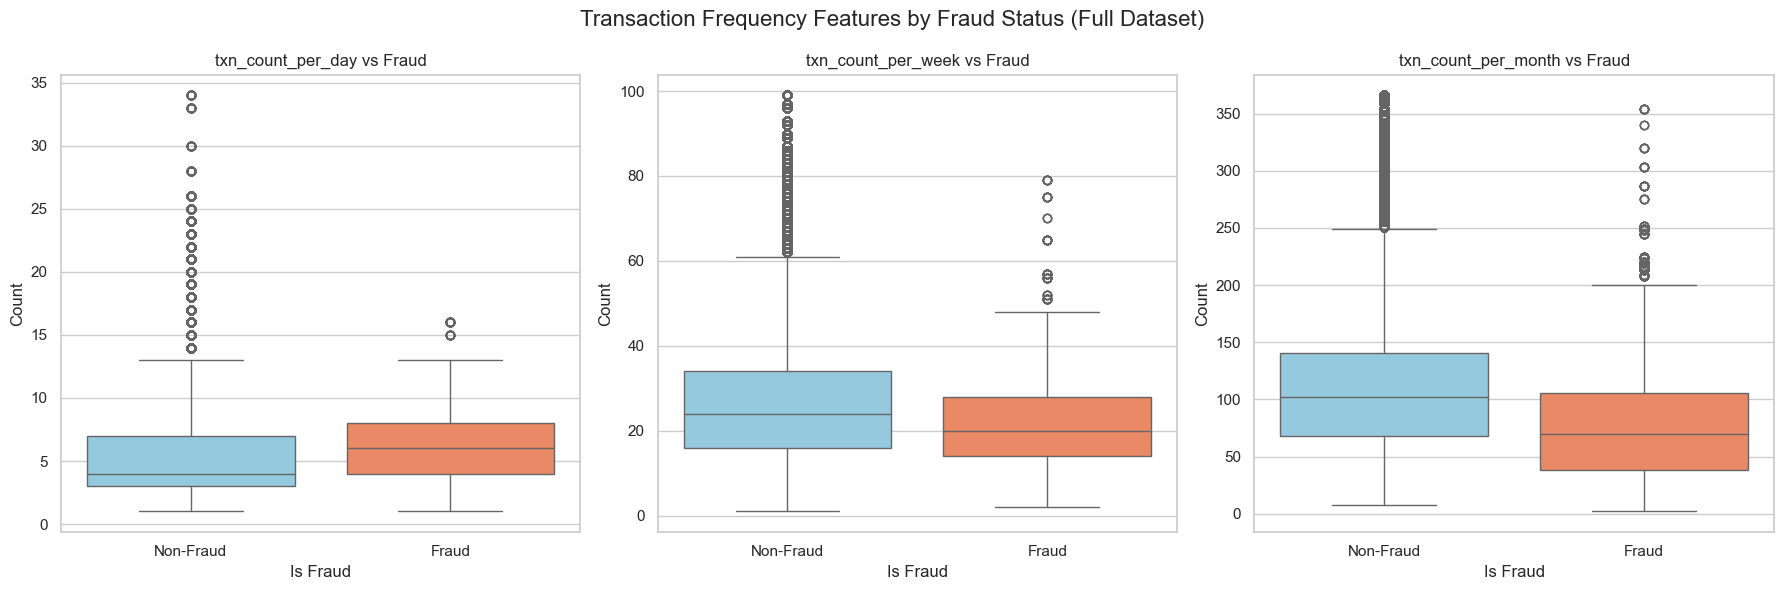

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df['is_fraud'] = df['is_fraud'].astype(str)

features = ['txn_count_per_day', 'txn_count_per_week', 'txn_count_per_month']
palette = {'0': 'skyblue', '1': 'coral'}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, feature in enumerate(features):
    sns.boxplot(
        data=df,
        x='is_fraud',
        y=feature,
        hue='is_fraud',
        palette=palette,
        ax=axes[i],
        legend=False
    )
    axes[i].set_title(f'{feature} vs Fraud')
    axes[i].set_xlabel('Is Fraud')
    axes[i].set_ylabel('Count')
    axes[i].set_xticklabels(['Non-Fraud', 'Fraud'])

plt.suptitle('Transaction Frequency Features by Fraud Status (Full Dataset)', fontsize=16)
plt.tight_layout()
plt.show()


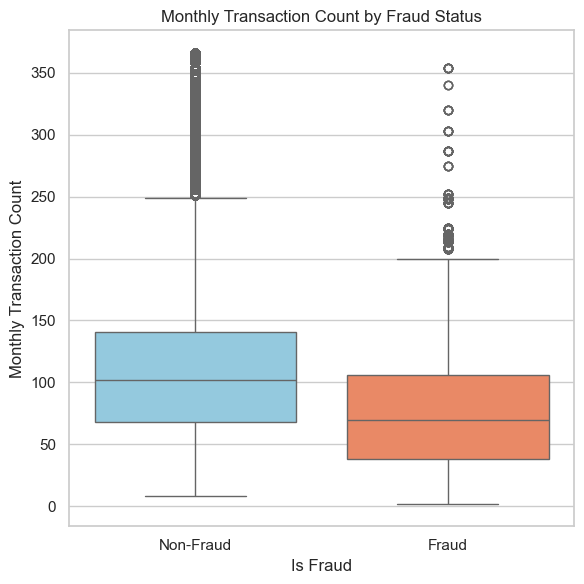

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df['is_fraud'] = df['is_fraud'].astype(str)

plt.figure(figsize=(6, 6))
sns.boxplot(
    data=df,
    x='is_fraud',
    y='txn_count_per_month',
    hue='is_fraud',
    palette={'0': 'skyblue', '1': 'coral'},
    legend=False
)

plt.title('Monthly Transaction Count by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Monthly Transaction Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()


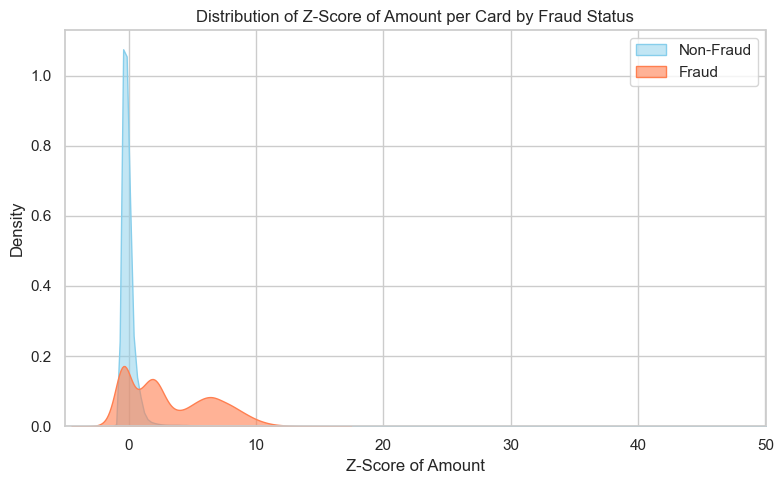

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=ndf[ndf['is_fraud'] == 0],
    x='z_score_amt_per_card',
    fill=True,
    label='Non-Fraud',
    color='skyblue',
    alpha=0.5
)
sns.kdeplot(
    data=ndf[ndf['is_fraud'] == 1],
    x='z_score_amt_per_card',
    fill=True,
    label='Fraud',
    color='coral',
    alpha=0.6
)
plt.title('Distribution of Z-Score of Amount per Card by Fraud Status')
plt.xlabel('Z-Score of Amount')
plt.ylabel('Density')
plt.xlim(-5, 50)
plt.legend()
plt.tight_layout()
plt.show()


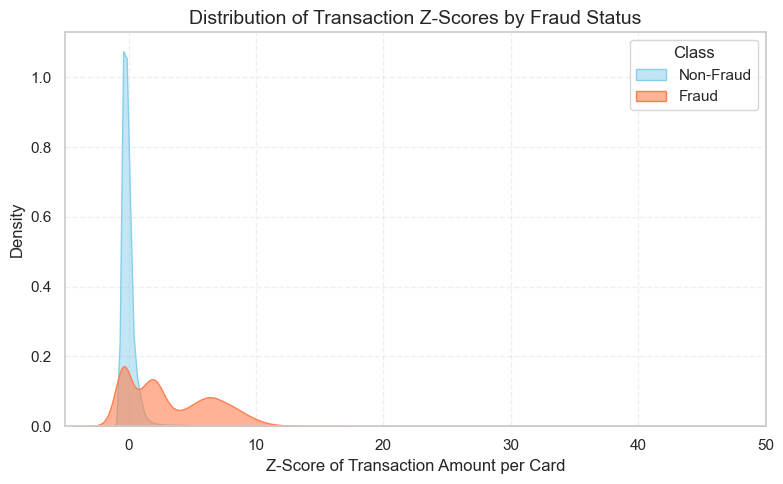

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))

sns.kdeplot(
    data=ndf[ndf['is_fraud'] == 0],
    x='z_score_amt_per_card',
    fill=True,
    label='Non-Fraud',
    color='skyblue',
    alpha=0.5
)

sns.kdeplot(
    data=ndf[ndf['is_fraud'] == 1],
    x='z_score_amt_per_card',
    fill=True,
    label='Fraud',
    color='coral',
    alpha=0.6
)

plt.title('Distribution of Transaction Z-Scores by Fraud Status', fontsize=14)
plt.xlabel('Z-Score of Transaction Amount per Card', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlim(-5, 50)  # Focus area
plt.legend(title='Class')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


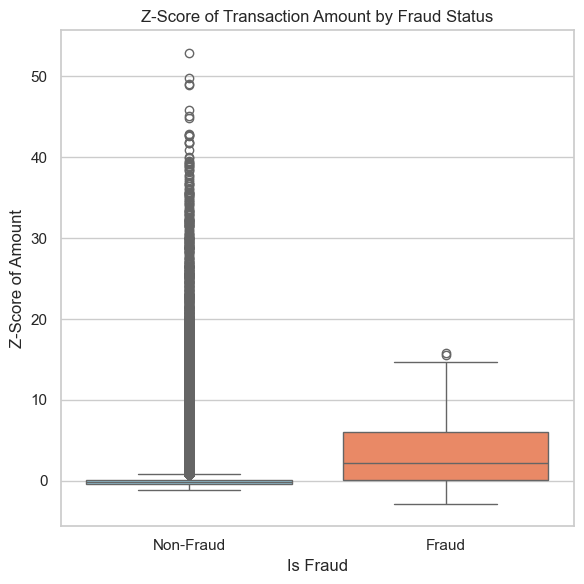

In [67]:
plt.figure(figsize=(6, 6))
sns.boxplot(
    data=ndf,
    x='is_fraud',
    y='z_score_amt_per_card',
    hue='is_fraud',
    palette={0: 'skyblue', 1: 'coral'},
    legend=False
)
plt.title('Z-Score of Transaction Amount by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Z-Score of Amount')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()


/var/folders/x0/50_cl34x1zg9wnnjkygh0svc0000gn/T/ipykernel_76814/2835420385.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


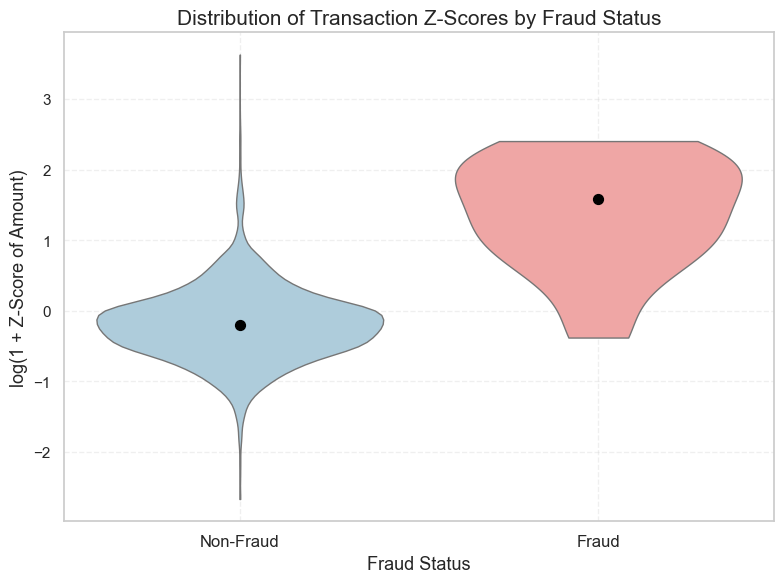

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sampled = ndf.sample(5000, random_state=42).copy()

sampled['is_fraud'] = sampled['is_fraud'].astype(str)

sampled['log_z_score'] = np.log1p(sampled['z_score_amt_per_card'])

palette = {'0': '#A6CEE3', '1': '#FB9A99'}  

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
ax = sns.violinplot(
    data=sampled,
    x='is_fraud',
    y='log_z_score',
    palette=palette,
    inner=None,  
    linewidth=1,
    cut=0
)

medians = sampled.groupby('is_fraud')['log_z_score'].median()
for i, label in enumerate(['0', '1']):
    ax.scatter(i, medians[label], color='black', s=50, zorder=5)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Non-Fraud', 'Fraud'], fontsize=12)
ax.set_xlabel('Fraud Status', fontsize=13)
ax.set_ylabel('log(1 + Z-Score of Amount)', fontsize=13)
ax.set_title('Distribution of Transaction Z-Scores by Fraud Status', fontsize=15)

ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


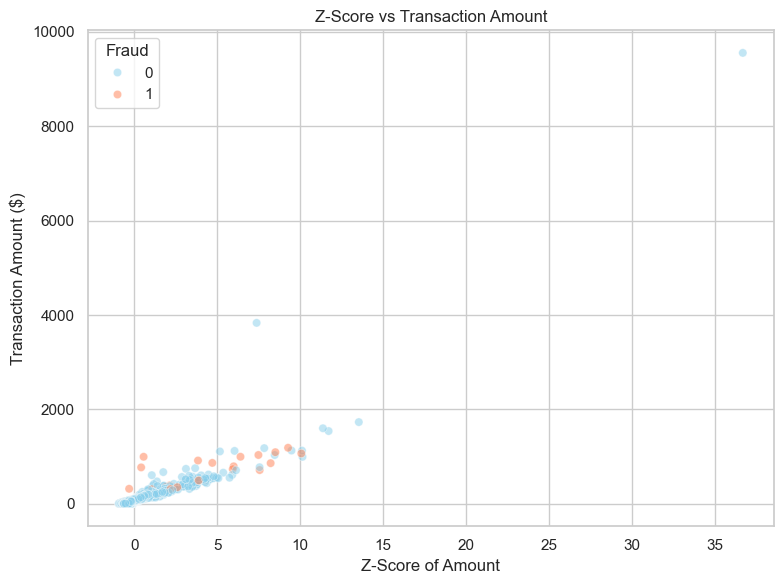

In [70]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=ndf.sample(5000, random_state=42),
    x='z_score_amt_per_card',
    y='amt',
    hue='is_fraud',
    palette={0: 'skyblue', 1: 'coral'},
    alpha=0.5
)
plt.title('Z-Score vs Transaction Amount')
plt.xlabel('Z-Score of Amount')
plt.ylabel('Transaction Amount ($)')
plt.legend(title='Fraud')
plt.tight_layout()
plt.show()


In [73]:
threshold = 4

fraud_above_threshold = ndf[
    (ndf['is_fraud'] == 1) & 
    (ndf['z_score_amt_per_card'] > threshold)
].shape[0]

total_frauds = ndf[ndf['is_fraud'] == 1].shape[0]

percentage_above_threshold = (fraud_above_threshold / total_frauds) * 100

print(f"Percentage of frauds with z-score > {threshold}: {percentage_above_threshold:.2f}%")


Percentage of frauds with z-score > 4: 37.93%


/var/folders/x0/50_cl34x1zg9wnnjkygh0svc0000gn/T/ipykernel_76814/2016541111.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gap_distribution, x='Time Gap Bucket', y='Percentage', palette='flare')


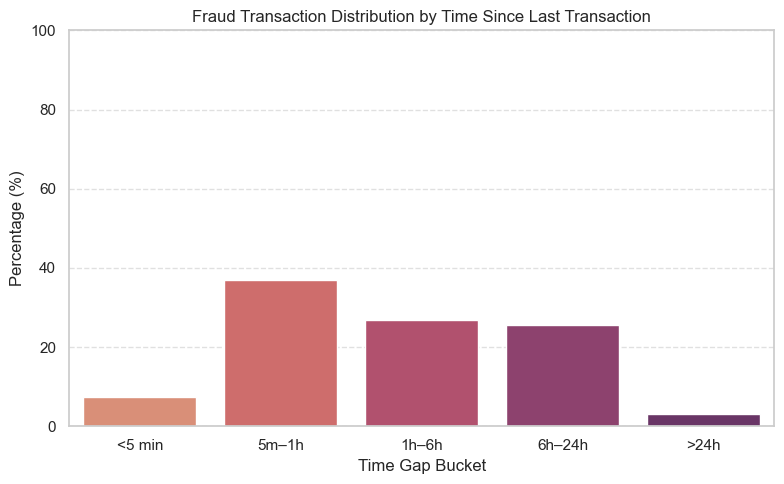

In [75]:
bins = [0, 300, 3600, 21600, 86400, float('inf')]
labels = ['<5 min', '5m–1h', '1h–6h', '6h–24h', '>24h']

fraud_df = df[df['is_fraud'] == '1'].copy()

fraud_df['txn_gap_bucket'] = pd.cut(fraud_df['time_since_last_txn'], bins=bins, labels=labels, right=False)

bucket_counts = fraud_df['txn_gap_bucket'].value_counts().sort_index()
bucket_percentages = (bucket_counts / bucket_counts.sum()) * 100

gap_distribution = pd.DataFrame({
    'Time Gap Bucket': labels,
    'Count': bucket_counts.values,
    'Percentage': bucket_percentages.values
})

plt.figure(figsize=(8, 5))
sns.barplot(data=gap_distribution, x='Time Gap Bucket', y='Percentage', palette='flare')
plt.title('Fraud Transaction Distribution by Time Since Last Transaction')
plt.ylabel('Percentage (%)')
plt.xlabel('Time Gap Bucket')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



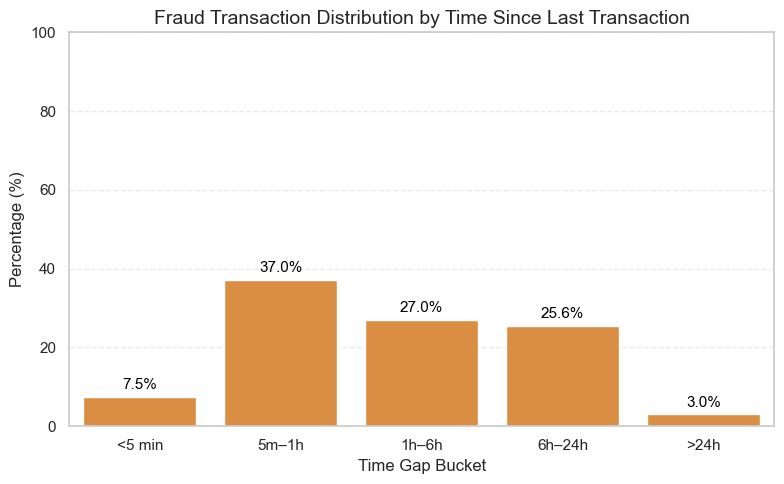

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bins = [0, 300, 3600, 21600, 86400, float('inf')]
labels = ['<5 min', '5m–1h', '1h–6h', '6h–24h', '>24h']

fraud_df = df[df['is_fraud'] == '1'].copy()

fraud_df['txn_gap_bucket'] = pd.cut(fraud_df['time_since_last_txn'], bins=bins, labels=labels, right=False)

bucket_counts = fraud_df['txn_gap_bucket'].value_counts().sort_index()
bucket_percentages = (bucket_counts / bucket_counts.sum()) * 100

gap_distribution = pd.DataFrame({
    'Time Gap Bucket': labels,
    'Count': bucket_counts.values,
    'Percentage': bucket_percentages.values
})

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=gap_distribution, x='Time Gap Bucket', y='Percentage', color='#f28e2b')  # solid clean color

for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 2,
        f'{height:.1f}%',
        ha='center',
        fontsize=11,
        color='black'
    )

plt.title('Fraud Transaction Distribution by Time Since Last Transaction', fontsize=14)
plt.xlabel('Time Gap Bucket', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig("/Users/sandyajaleshkumar/Desktop/time_gap_bucket_vs_fraud%.png", dpi=300)
plt.show()


In [79]:
print(gap_distribution)

  Time Gap Bucket  Count  Percentage
0          <5 min    562    7.487343
1           5m–1h   2779   37.023714
2           1h–6h   2023   26.951772
3          6h–24h   1918   25.552891
4            >24h    224    2.984279


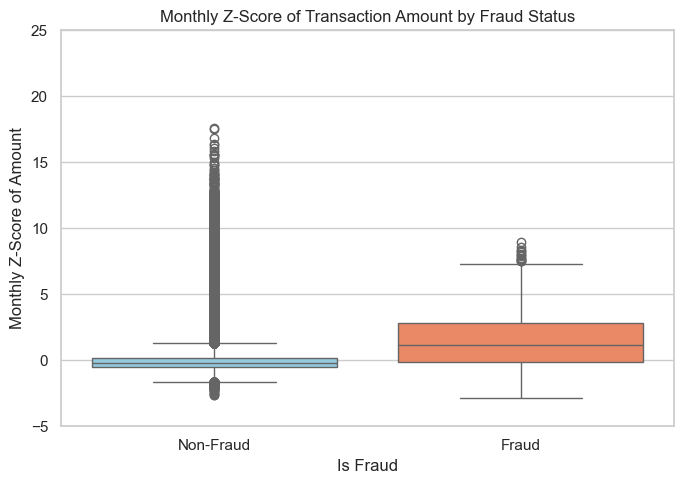

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

df['is_fraud'] = df['is_fraud'].astype(str)

plt.figure(figsize=(7, 5))
sns.boxplot(
    data=df,
    x='is_fraud',
    y='monthly_z_score_amt',
    hue='is_fraud',
    palette={'0': 'skyblue', '1': 'coral'},
    legend=False
)
plt.title('Monthly Z-Score of Transaction Amount by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Monthly Z-Score of Amount')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.ylim(-5, 25)  
plt.tight_layout()
plt.show()


Encoding

In [82]:
ndf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 33 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   state                  1296675 non-null  object        
 7   city_pop               1296675 non-null  int64         
 8   job                    1296675 non-null  object        
 9   is_fraud               1296675 non-null  int64         
 10  rolling_txn_count_7d   1296675 non-null  float64       
 11  rolling_amt_sum_7d     1296675 non-null  float64       
 12  hour                   12966

In [83]:

columns_to_drop = [
    'cc_num', 'trans_date_trans_time',
    'std_amt_per_card', 'avg_amt_per_card',
    'monthly_avg_amt', 'monthly_std_amt'
]

ndf_encoded = ndf.drop(columns=columns_to_drop)


In [84]:
ndf_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 27 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   merchant              1296675 non-null  object  
 1   category              1296675 non-null  object  
 2   amt                   1296675 non-null  float64 
 3   gender                1296675 non-null  object  
 4   state                 1296675 non-null  object  
 5   city_pop              1296675 non-null  int64   
 6   job                   1296675 non-null  object  
 7   is_fraud              1296675 non-null  int64   
 8   rolling_txn_count_7d  1296675 non-null  float64 
 9   rolling_amt_sum_7d    1296675 non-null  float64 
 10  hour                  1296675 non-null  int32   
 11  day                   1296675 non-null  int32   
 12  day_of_week           1296675 non-null  int32   
 13  txn_count_per_day     1296675 non-null  int64   
 14  txn_count_per_week

In [87]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

for col in ['merchant', 'job', 'state']:
    freq_encoding = ndf_encoded[col].value_counts().to_dict()
    ndf_encoded[col + '_freq'] = ndf_encoded[col].map(freq_encoding)




In [89]:
ndf_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 30 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   merchant              1296675 non-null  object  
 1   category              1296675 non-null  object  
 2   amt                   1296675 non-null  float64 
 3   gender                1296675 non-null  object  
 4   state                 1296675 non-null  object  
 5   city_pop              1296675 non-null  int64   
 6   job                   1296675 non-null  object  
 7   is_fraud              1296675 non-null  int64   
 8   rolling_txn_count_7d  1296675 non-null  float64 
 9   rolling_amt_sum_7d    1296675 non-null  float64 
 10  hour                  1296675 non-null  int32   
 11  day                   1296675 non-null  int32   
 12  day_of_week           1296675 non-null  int32   
 13  txn_count_per_day     1296675 non-null  int64   
 14  txn_count_per_week

In [91]:
ndf_encoded = pd.get_dummies(ndf_encoded, columns=['category'], prefix='cat')

In [95]:

le = LabelEncoder()
ndf_encoded['gender_encoded'] = le.fit_transform(ndf_encoded['gender'])

ordinal_mapping = {cat: idx for idx, cat in enumerate(sorted(ndf_encoded['amt_bucket'].unique()))}
ndf_encoded['amt_bucket_encoded'] = ndf_encoded['amt_bucket'].map(ordinal_mapping)

ndf_encoded.drop(columns=['merchant', 'job', 'state', 'gender', 'amt_bucket'], inplace=True)


In [96]:
ndf_encoded

,amt,city_pop,is_fraud,rolling_txn_count_7d,rolling_amt_sum_7d,hour,day,day_of_week,txn_count_per_day,txn_count_per_week,...,cat_home,cat_kids_pets,cat_misc_net,cat_misc_pos,cat_personal_care,cat_shopping_net,cat_shopping_pos,cat_travel,gender_encoded,amt_bucket_encoded
0,7.27,1645,0,1.0,7.27,12,1,1,1,11,...,False,False,True,False,False,False,False,False,0,5
1,52.94,1645,0,2.0,60.21,8,2,2,4,11,...,False,False,False,False,False,False,False,False,0,2
2,82.08,1645,0,3.0,142.29,8,2,2,4,11,...,False,False,False,False,False,False,False,False,0,2
3,34.79,1645,0,4.0,177.08,12,2,2,4,11,...,False,True,False,False,False,False,False,False,0,2
4,27.18,1645,0,5.0,204.26,13,2,2,4,11,...,True,False,False,False,False,False,False,False,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,60.47,532,0,29.0,1457.18,21,20,5,4,29,...,False,False,False,False,True,False,False,False,1,2
1296671,74.29,532,0,24.0,1088.19,0,21,6,4,4,...,False,False,False,False,False,False,False,False,1,2
1296672,246.56,532,0,25.0,1334.75,2,21,6,4,4,...,False,False,False,False,False,True,False,False,1,3
1296673,2.62,532,0,26.0,1337.37,8,21,6,4,4,...,False,False,False,False,False,False,True,False,1,5


In [97]:
ndf_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 40 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   amt                   1296675 non-null  float64 
 1   city_pop              1296675 non-null  int64   
 2   is_fraud              1296675 non-null  int64   
 3   rolling_txn_count_7d  1296675 non-null  float64 
 4   rolling_amt_sum_7d    1296675 non-null  float64 
 5   hour                  1296675 non-null  int32   
 6   day                   1296675 non-null  int32   
 7   day_of_week           1296675 non-null  int32   
 8   txn_count_per_day     1296675 non-null  int64   
 9   txn_count_per_week    1296675 non-null  int64   
 10  txn_count_per_month   1296675 non-null  int64   
 11  age                   1296675 non-null  int32   
 12  is_weekend            1296675 non-null  int64   
 13  is_night              1296675 non-null  int64   
 14  distance_to_mercha

In [98]:
ndf_encoded['is_fraud'] = ndf_encoded['is_fraud'].astype(int)


In [101]:
ndf_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 40 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   amt                   1296675 non-null  float64 
 1   city_pop              1296675 non-null  int64   
 2   is_fraud              1296675 non-null  int64   
 3   rolling_txn_count_7d  1296675 non-null  float64 
 4   rolling_amt_sum_7d    1296675 non-null  float64 
 5   hour                  1296675 non-null  int32   
 6   day                   1296675 non-null  int32   
 7   day_of_week           1296675 non-null  int32   
 8   txn_count_per_day     1296675 non-null  int64   
 9   txn_count_per_week    1296675 non-null  int64   
 10  txn_count_per_month   1296675 non-null  int64   
 11  age                   1296675 non-null  int32   
 12  is_weekend            1296675 non-null  int64   
 13  is_night              1296675 non-null  int64   
 14  distance_to_mercha

In [102]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

ndf_encoded['is_fraud'] = ndf_encoded['is_fraud'].astype(int)

X = ndf_encoded.drop(columns=['is_fraud'])
y = ndf_encoded['is_fraud']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

y_resampled.value_counts()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


is_fraud
0    1289169
1    1289169
Name: count, dtype: int64

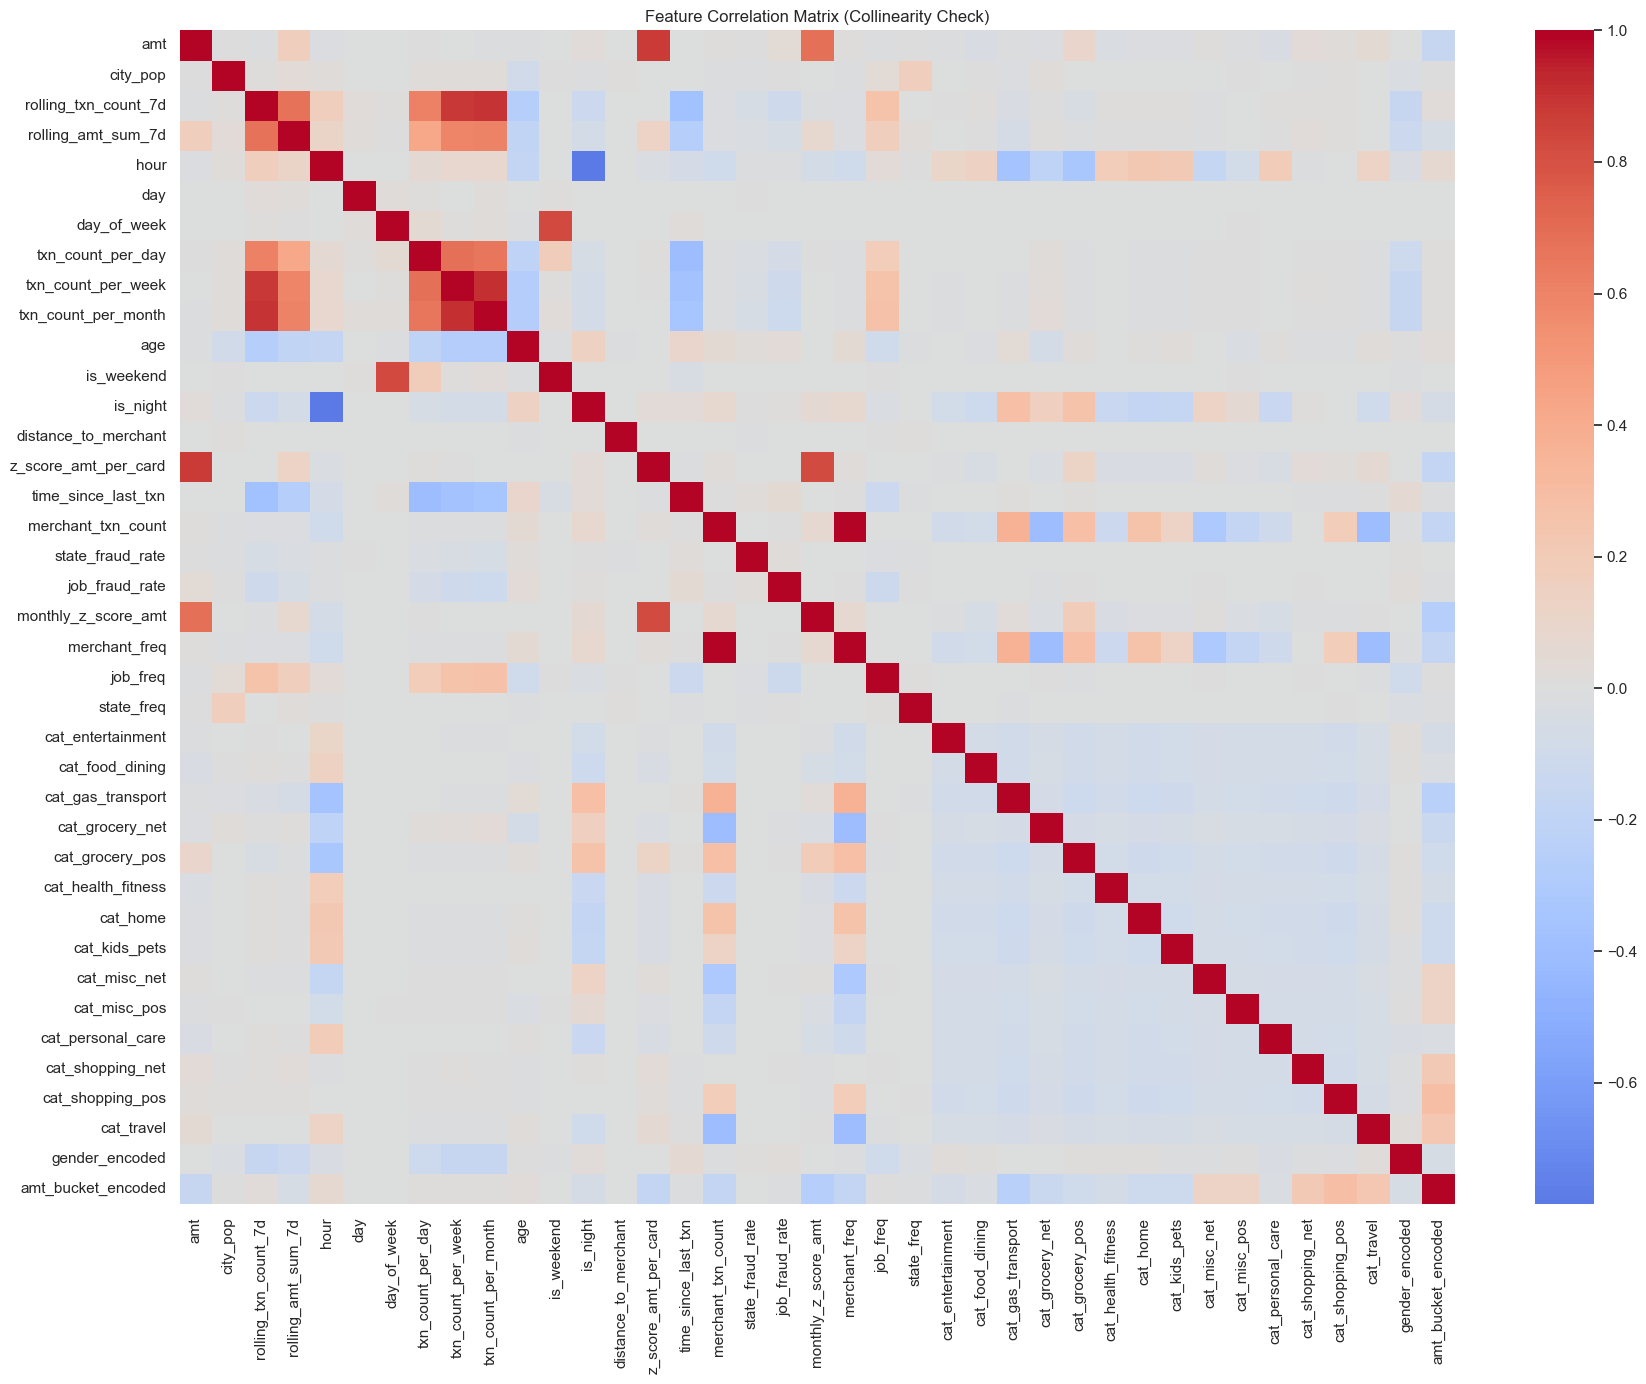

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X = ndf_encoded.drop(columns=['is_fraud'])

X_corr = X.copy()
X_corr = X_corr.astype({col: int for col in X_corr.select_dtypes('bool').columns})

corr_matrix = X_corr.corr()

plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", center=0)
plt.title("Feature Correlation Matrix (Collinearity Check)")
plt.tight_layout()
plt.show()


In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

X = ndf_encoded.drop(columns=['is_fraud'])

X = X.astype({col: int for col in X.select_dtypes('bool').columns})

X = add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values("VIF", ascending=False)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
34,cat_personal_care,inf
28,cat_grocery_pos,inf
26,cat_gas_transport,inf
25,cat_food_dining,inf
24,cat_entertainment,inf
29,cat_health_fitness,inf
30,cat_home,inf
21,merchant_freq,inf
31,cat_kids_pets,inf
32,cat_misc_net,inf


In [115]:
ndf_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 40 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   amt                   1296675 non-null  float64 
 1   city_pop              1296675 non-null  int64   
 2   is_fraud              1296675 non-null  int64   
 3   rolling_txn_count_7d  1296675 non-null  float64 
 4   rolling_amt_sum_7d    1296675 non-null  float64 
 5   hour                  1296675 non-null  int32   
 6   day                   1296675 non-null  int32   
 7   day_of_week           1296675 non-null  int32   
 8   txn_count_per_day     1296675 non-null  int64   
 9   txn_count_per_week    1296675 non-null  int64   
 10  txn_count_per_month   1296675 non-null  int64   
 11  age                   1296675 non-null  int32   
 12  is_weekend            1296675 non-null  int64   
 13  is_night              1296675 non-null  int64   
 14  distance_to_mercha

### LOGISTIC REGRESSION - SMOTE

TRAIN

In [309]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import statsmodels.api as sm

X = ndf_encoded.drop(columns=['is_fraud'], errors='ignore')
y = ndf_encoded['is_fraud'].astype(int)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled = X_resampled.astype({col: int for col in X_resampled.select_dtypes('bool').columns})

X_resampled.replace([np.inf, -np.inf], np.nan, inplace=True)
X_resampled.dropna(inplace=True)
y_resampled = y_resampled.loc[X_resampled.index]

X_resampled = sm.add_constant(X_resampled)

logit_model = sm.Logit(y_resampled, X_resampled).fit(disp=0)

y_pred = logit_model.predict(X_resampled) > 0.5

report_dict = classification_report(y_resampled, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).T.round(3)

print(logit_model.summary())
print("\nClassification Report:\n")
print(report_df)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:              1702283
Model:                          Logit   Df Residuals:                  1702243
Method:                           MLE   Df Model:                           39
Date:                Thu, 10 Apr 2025   Pseudo R-squ.:                  0.8464
Time:                        13:53:16   Log-Likelihood:            -1.4488e+05
converged:                      False   LL-Null:                   -9.4332e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -30.9735      0.337    -91.817      0.000     -31.635     -30.312
amt                      0.0076   7.02e-05    108.334      0.000       0.007       0.008
city_pop    

TEST

In [310]:
test_df = pd.read_csv("/Users/sandyajaleshkumar/Desktop/Data Analytics & Data Mining/Assignment/Datasets/preprocessed_test.csv")

X_test = test_df.drop(columns=['is_fraud'], errors='ignore')
y_test = test_df['is_fraud'].astype(int)

X_test = X_test.astype({col: int for col in X_test.select_dtypes('bool').columns})

X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.dropna(inplace=True)
y_test = y_test.loc[X_test.index]

trained_cols = logit_model.model.exog_names 
if 'const' in X_test.columns:
    X_test = X_test.drop(columns='const')  

X_test_aligned = X_test[trained_cols[1:]] 
X_test_aligned = sm.add_constant(X_test_aligned)

y_pred_test = logit_model.predict(X_test_aligned) > 0.5

from sklearn.metrics import classification_report
report_test = classification_report(y_test, y_pred_test, output_dict=True)
report_test_df = pd.DataFrame(report_test).T.round(3)

print("\nLogistic Regression Performance on Test Set:\n")
print(report_test_df)



Logistic Regression Performance on Test Set:

              precision  recall  f1-score    support
0                 0.999   0.991     0.995  553574.00
1                 0.239   0.710     0.358    2145.00
accuracy          0.990   0.990     0.990       0.99
macro avg         0.619   0.851     0.676  555719.00
weighted avg      0.996   0.990     0.993  555719.00


### RANDOM FOREST - SMOTE

TRAIN

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

X = ndf_encoded.drop(columns=['is_fraud'], errors='ignore')
y = ndf_encoded['is_fraud'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_train = X_train.astype({col: int for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: int for col in X_test.select_dtypes('bool').columns})

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
report_rf_df = pd.DataFrame(report_rf).T.round(3)

report_rf_df, roc_auc_rf


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


(              precision  recall  f1-score     support
 0                 0.999   1.000     0.999  386751.000
 1                 0.939   0.836     0.884    2252.000
 accuracy          0.999   0.999     0.999       0.999
 macro avg         0.969   0.918     0.942  389003.000
 weighted avg      0.999   0.999     0.999  389003.000,
 0.9964995934179781)

TEST

In [305]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score

test_df = pd.read_csv("/Users/sandyajaleshkumar/Desktop/Data Analytics & Data Mining/Assignment/Datasets/preprocessed_test.csv")

X_test_ext = test_df.drop(columns=['is_fraud'], errors='ignore')
y_test_ext = test_df['is_fraud'].astype(int)

X_test_ext = X_test_ext.astype({col: int for col in X_test_ext.select_dtypes('bool').columns})

X_test_ext.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_ext.dropna(inplace=True)
y_test_ext = y_test_ext.loc[X_test_ext.index]

y_pred_rf_ext = rf_model.predict(X_test_ext)
y_prob_rf_ext = rf_model.predict_proba(X_test_ext)[:, 1]

report_rf_ext = classification_report(y_test_ext, y_pred_rf_ext, output_dict=True)
roc_auc_rf_ext = roc_auc_score(y_test_ext, y_prob_rf_ext)
report_rf_ext_df = pd.DataFrame(report_rf_ext).T.round(3)

report_rf_ext_df, roc_auc_rf_ext


(              precision  recall  f1-score     support
 0                 0.997   1.000     0.998  553574.000
 1                 0.955   0.230     0.371    2145.000
 accuracy          0.997   0.997     0.997       0.997
 macro avg         0.976   0.615     0.685  555719.000
 weighted avg      0.997   0.997     0.996  555719.000,
 0.9857240421920122)

### XGBOOST - SMOTE

TRAIN

In [291]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import pandas as pd

X = ndf_encoded.drop(columns=['is_fraud'], errors='ignore')
y = ndf_encoded['is_fraud'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_train = X_train.astype({col: int for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: int for col in X_test.select_dtypes('bool').columns})

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

X_train_smote = X_train_smote.apply(lambda col: col.cat.codes if col.dtype.name == 'category' else col)
X_test = X_test.apply(lambda col: col.cat.codes if col.dtype.name == 'category' else col)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)

y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
report_xgb_df = pd.DataFrame(report_xgb).T.round(3)

report_xgb_df, roc_auc_xgb


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:09:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


(              precision  recall  f1-score     support
 0                 1.000   1.000     1.000  386751.000
 1                 0.932   0.925     0.928    2252.000
 accuracy          0.999   0.999     0.999       0.999
 macro avg         0.966   0.963     0.964  389003.000
 weighted avg      0.999   0.999     0.999  389003.000,
 0.9994288536297511)

TEST 

In [297]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score

test_df = pd.read_csv("/Users/sandyajaleshkumar/Desktop/Data Analytics & Data Mining/Assignment/Datasets/preprocessed_test.csv")

X_test_ext = test_df.drop(columns=['is_fraud'])
y_test_ext = test_df['is_fraud'].astype(int)

X_test_ext = X_test_ext.astype({col: int for col in X_test_ext.select_dtypes('bool').columns})

X_test_ext = X_test_ext.apply(lambda col: col.cat.codes if col.dtype.name == 'category' else col)

X_test_ext.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_ext.dropna(inplace=True)
y_test_ext = y_test_ext.loc[X_test_ext.index] 

y_pred_ext = xgb_model.predict(X_test_ext)
y_prob_ext = xgb_model.predict_proba(X_test_ext)[:, 1]

report_ext = classification_report(y_test_ext, y_pred_ext, output_dict=True)
roc_auc_ext = roc_auc_score(y_test_ext, y_prob_ext)
report_ext_df = pd.DataFrame(report_ext).T.round(3)

report_ext_df, roc_auc_ext


(              precision  recall  f1-score     support
 0                 1.000   1.000     1.000  553574.000
 1                 0.927   0.873     0.899    2145.000
 accuracy          0.999   0.999     0.999       0.999
 macro avg         0.963   0.936     0.949  555719.000
 weighted avg      0.999   0.999     0.999  555719.000,
 0.9985781759105651)

### KNN - SMOTE 

TRAIN

In [210]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

X = ndf_encoded.drop(columns=['is_fraud'], errors='ignore')
y = ndf_encoded['is_fraud'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

X_train = X_train.astype({col: int for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: int for col in X_test.select_dtypes('bool').columns})

X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_smote, y_train_smote)

y_pred_knn = knn_model.predict(X_test_scaled)
y_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
report_knn_df = pd.DataFrame(report_knn).T.round(3)

report_knn_df, roc_auc_knn


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


(              precision  recall  f1-score     support
 0                 0.999   0.995     0.997  386751.000
 1                 0.493   0.864     0.627    2252.000
 accuracy          0.994   0.994     0.994       0.994
 macro avg         0.746   0.929     0.812  389003.000
 weighted avg      0.996   0.994     0.995  389003.000,
 0.9400985622755068)

TEST

In [215]:
X_test_ext_knn = pd.read_csv("/Users/sandyajaleshkumar/Desktop/Data Analytics & Data Mining/Assignment/Datasets/preprocessed_test.csv")
y_test_ext_knn = X_test_ext_knn['is_fraud'].astype(int)
X_test_ext_knn = X_test_ext_knn.drop(columns=['is_fraud'])

X_test_ext_knn = X_test_ext_knn.astype({col: int for col in X_test_ext_knn.select_dtypes('bool').columns})
X_test_ext_knn.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_ext_knn.dropna(inplace=True)
y_test_ext_knn = y_test_ext_knn.loc[X_test_ext_knn.index]

X_test_ext_knn_scaled = scaler.transform(X_test_ext_knn)

y_pred_ext_knn = knn_model.predict(X_test_ext_knn_scaled)
y_prob_ext_knn = knn_model.predict_proba(X_test_ext_knn_scaled)[:, 1]

report_ext_knn = classification_report(y_test_ext_knn, y_pred_ext_knn, output_dict=True)
roc_auc_ext_knn = roc_auc_score(y_test_ext_knn, y_prob_ext_knn)
report_ext_knn_df = pd.DataFrame(report_ext_knn).T.round(3)

report_ext_knn_df, roc_auc_ext_knn


(              precision  recall  f1-score     support
 0                 0.999   0.996     0.998  553574.000
 1                 0.428   0.786     0.554    2145.000
 accuracy          0.995   0.995     0.995       0.995
 macro avg         0.713   0.891     0.776  555719.000
 weighted avg      0.997   0.995     0.996  555719.000,
 0.9092205182339475)

### SVM - SMOTE

TRAIN

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

X = ndf_encoded.drop(columns=['is_fraud'], errors='ignore')
y = ndf_encoded['is_fraud'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_train = X_train.astype({col: int for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: int for col in X_test.select_dtypes('bool').columns})

X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_smote, y_train_smote)

y_pred_svm = svm_model.predict(X_test_scaled)
y_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)
report_svm_df = pd.DataFrame(report_svm).T.round(3)

report_svm_df, roc_auc_svm


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


TEST

In [ ]:
external_test_df = pd.read_csv("/Users/sandyajaleshkumar/Desktop/Data Analytics & Data Mining/Assignment/Datasets/preprocessed_test.csv")

X_test_ext = external_test_df.drop(columns=['is_fraud'], errors='ignore')
y_test_ext = external_test_df['is_fraud'].astype(int)

X_test_ext = X_test_ext.astype({col: int for col in X_test_ext.select_dtypes('bool').columns})

X_test_ext.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_ext.dropna(inplace=True)
y_test_ext = y_test_ext.loc[X_test_ext.index]

X_test_ext_scaled = scaler.transform(X_test_ext) 

y_pred_ext_svm = svm_model.predict(X_test_ext_scaled)
y_prob_ext_svm = svm_model.predict_proba(X_test_ext_scaled)[:, 1]

report_ext_svm = classification_report(y_test_ext, y_pred_ext_svm, output_dict=True)
roc_auc_ext_svm = roc_auc_score(y_test_ext, y_prob_ext_svm)
report_ext_svm_df = pd.DataFrame(report_ext_svm).T.round(3)

report_ext_svm_df, roc_auc_ext_svm


### MLP - SMOTE

TRAIN

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

X = ndf_encoded.drop(columns=['is_fraud'], errors='ignore')
y = ndf_encoded['is_fraud'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

X_train = X_train.astype({col: int for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: int for col in X_test.select_dtypes('bool').columns})

X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train_smote, y_train_smote)

y_pred_mlp = mlp_model.predict(X_test_scaled)
y_prob_mlp = mlp_model.predict_proba(X_test_scaled)[:, 1]

report_mlp = classification_report(y_test, y_pred_mlp, output_dict=True)
roc_auc_mlp = roc_auc_score(y_test, y_prob_mlp)
report_mlp_df = pd.DataFrame(report_mlp).T.round(3)

report_mlp_df, roc_auc_mlp


TEST

In [ ]:
X_test_ext_mlp = pd.read_csv("/Users/sandyajaleshkumar/Desktop/Data Analytics & Data Mining/Assignment/Datasets/preprocessed_test.csv")
y_test_ext_mlp = X_test_ext_mlp['is_fraud'].astype(int)
X_test_ext_mlp = X_test_ext_mlp.drop(columns=['is_fraud'])

X_test_ext_mlp = X_test_ext_mlp.astype({col: int for col in X_test_ext_mlp.select_dtypes('bool').columns})
X_test_ext_mlp.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_ext_mlp.dropna(inplace=True)
y_test_ext_mlp = y_test_ext_mlp.loc[X_test_ext_mlp.index]

X_test_ext_mlp_scaled = scaler.transform(X_test_ext_mlp)

y_pred_ext_mlp = mlp_model.predict(X_test_ext_mlp_scaled)
y_prob_ext_mlp = mlp_model.predict_proba(X_test_ext_mlp_scaled)[:, 1]

report_ext_mlp = classification_report(y_test_ext_mlp, y_pred_ext_mlp, output_dict=True)
roc_auc_ext_mlp = roc_auc_score(y_test_ext_mlp, y_prob_ext_mlp)
report_ext_mlp_df = pd.DataFrame(report_ext_mlp).T.round(3)

report_ext_mlp_df, roc_auc_ext_mlp


### Logistic Regression - Undersampling

TRAIN

In [141]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import numpy as np

X = ndf_encoded.drop(columns=['is_fraud'], errors='ignore')
y = ndf_encoded['is_fraud'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

X_train = X_train.astype({col: int for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: int for col in X_test.select_dtypes('bool').columns})

X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.dropna(inplace=True)
y_train = y_train.loc[X_train.index]

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

log_model_rus = LogisticRegression(max_iter=1000, random_state=42)
log_model_rus.fit(X_train_rus, y_train_rus)

X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.dropna(inplace=True)
y_test = y_test.loc[X_test.index]

y_pred_rus = log_model_rus.predict(X_test)
y_prob_rus = log_model_rus.predict_proba(X_test)[:, 1]

report_rus = classification_report(y_test, y_pred_rus, output_dict=True)
roc_auc_rus = roc_auc_score(y_test, y_prob_rus)
report_rus_df = pd.DataFrame(report_rus).T.round(3)

report_rus_df, roc_auc_rus


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(              precision  recall  f1-score     support
 0                 0.999   0.942     0.970  386751.000
 1                 0.079   0.857     0.144    2252.000
 accuracy          0.941   0.941     0.941       0.941
 macro avg         0.539   0.900     0.557  389003.000
 weighted avg      0.994   0.941     0.965  389003.000,
 0.9498433683629168)

TEST

In [154]:
external_test_df = pd.read_csv("/Users/sandyajaleshkumar/Desktop/Data Analytics & Data Mining/Assignment/Datasets/preprocessed_test.csv")

X_test_ext = external_test_df.drop(columns=['is_fraud'], errors='ignore')
y_test_ext = external_test_df['is_fraud'].astype(int)

X_test_ext = X_test_ext.astype({col: int for col in X_test_ext.select_dtypes('bool').columns})

X_test_ext.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_ext.dropna(inplace=True)
y_test_ext = y_test_ext.loc[X_test_ext.index]

y_pred_ext_rus = log_model_rus.predict(X_test_ext)
y_prob_ext_rus = log_model_rus.predict_proba(X_test_ext)[:, 1]

report_ext_rus = classification_report(y_test_ext, y_pred_ext_rus, output_dict=True)
roc_auc_ext_rus = roc_auc_score(y_test_ext, y_prob_ext_rus)
report_ext_rus_df = pd.DataFrame(report_ext_rus).T.round(3)

report_ext_rus_df, roc_auc_ext_rus


(              precision  recall  f1-score     support
 0                 0.999   0.950     0.974  553574.000
 1                 0.060   0.824     0.112    2145.000
 accuracy          0.949   0.949     0.949       0.949
 macro avg         0.530   0.887     0.543  555719.000
 weighted avg      0.996   0.949     0.971  555719.000,
 0.9342914792397607)

### Random Forest  - Undersampling

TRAIN

In [146]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import numpy as np

X = ndf_encoded.drop(columns=['is_fraud'], errors='ignore')
y = ndf_encoded['is_fraud'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

X_train = X_train.astype({col: int for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: int for col in X_test.select_dtypes('bool').columns})

X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.dropna(inplace=True)
y_train = y_train.loc[X_train.index]

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

rf_model_rus = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_rus.fit(X_train_rus, y_train_rus)

X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.dropna(inplace=True)
y_test = y_test.loc[X_test.index]

y_pred_rf_rus = rf_model_rus.predict(X_test)
y_prob_rf_rus = rf_model_rus.predict_proba(X_test)[:, 1]

report_rf_rus = classification_report(y_test, y_pred_rf_rus, output_dict=True)
roc_auc_rf_rus = roc_auc_score(y_test, y_prob_rf_rus)
report_rf_rus_df = pd.DataFrame(report_rf_rus).T.round(3)

report_rf_rus_df, roc_auc_rf_rus


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


(              precision  recall  f1-score     support
 0                 1.000   0.986     0.993  386751.000
 1                 0.285   0.970     0.441    2252.000
 accuracy          0.986   0.986     0.986       0.986
 macro avg         0.643   0.978     0.717  389003.000
 weighted avg      0.996   0.986     0.990  389003.000,
 0.9978897806586218)

TEST

In [158]:
external_test_df = pd.read_csv("/Users/sandyajaleshkumar/Desktop/Data Analytics & Data Mining/Assignment/Datasets/preprocessed_test.csv")

X_test_ext = external_test_df.drop(columns=['is_fraud'], errors='ignore')
y_test_ext = external_test_df['is_fraud'].astype(int)

X_test_ext = X_test_ext.astype({col: int for col in X_test_ext.select_dtypes('bool').columns})

X_test_ext.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_ext.dropna(inplace=True)
y_test_ext = y_test_ext.loc[X_test_ext.index]

y_pred_ext_rf_rus = rf_model_rus.predict(X_test_ext)
y_prob_ext_rf_rus = rf_model_rus.predict_proba(X_test_ext)[:, 1]

report_ext_rf_rus = classification_report(y_test_ext, y_pred_ext_rf_rus, output_dict=True)
roc_auc_ext_rf_rus = roc_auc_score(y_test_ext, y_prob_ext_rf_rus)
report_ext_rf_rus_df = pd.DataFrame(report_ext_rf_rus).T.round(3)

report_ext_rf_rus_df, roc_auc_ext_rf_rus


(              precision  recall  f1-score     support
 0                 0.999   0.993     0.996  553574.000
 1                 0.323   0.814     0.463    2145.000
 accuracy          0.993   0.993     0.993       0.993
 macro avg         0.661   0.904     0.730  555719.000
 weighted avg      0.997   0.993     0.994  555719.000,
 0.9940918889073969)

### XGBOOST - Undersampling

In [ ]:
TRAIN

In [152]:
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import numpy as np

X = ndf_encoded.drop(columns=['is_fraud'], errors='ignore')
y = ndf_encoded['is_fraud'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

X_train = X_train.astype({col: int for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: int for col in X_test.select_dtypes('bool').columns})

X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.dropna(inplace=True)
y_train = y_train.loc[X_train.index]

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

X_train_rus = X_train_rus.apply(lambda col: col.cat.codes if col.dtype.name == 'category' else col)
X_test = X_test.apply(lambda col: col.cat.codes if col.dtype.name == 'category' else col)

xgb_model_rus = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_rus.fit(X_train_rus, y_train_rus)

X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.dropna(inplace=True)
y_test = y_test.loc[X_test.index]

y_pred_rus_xgb = xgb_model_rus.predict(X_test)
y_prob_rus_xgb = xgb_model_rus.predict_proba(X_test)[:, 1]

report_rus_xgb = classification_report(y_test, y_pred_rus_xgb, output_dict=True)
roc_auc_rus_xgb = roc_auc_score(y_test, y_prob_rus_xgb)
report_rus_xgb_df = pd.DataFrame(report_rus_xgb).T.round(3)

report_rus_xgb_df, roc_auc_rus_xgb


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:44:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


(              precision  recall  f1-score     support
 0                 1.000   0.989     0.995  386751.000
 1                 0.353   0.986     0.520    2252.000
 accuracy          0.989   0.989     0.989       0.989
 macro avg         0.676   0.988     0.757  389003.000
 weighted avg      0.996   0.989     0.992  389003.000,
 0.9992611180798705)

In [ ]:
TEST

In [160]:
external_test_df = pd.read_csv("/Users/sandyajaleshkumar/Desktop/Data Analytics & Data Mining/Assignment/Datasets/preprocessed_test.csv")

X_test_ext = external_test_df.drop(columns=['is_fraud'], errors='ignore')
y_test_ext = external_test_df['is_fraud'].astype(int)

X_test_ext = X_test_ext.astype({col: int for col in X_test_ext.select_dtypes('bool').columns})

X_test_ext = X_test_ext.apply(lambda col: col.cat.codes if col.dtype.name == 'category' else col)

X_test_ext.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_ext.dropna(inplace=True)
y_test_ext = y_test_ext.loc[X_test_ext.index]

y_pred_ext_xgb_rus = xgb_model_rus.predict(X_test_ext)
y_prob_ext_xgb_rus = xgb_model_rus.predict_proba(X_test_ext)[:, 1]

report_ext_xgb_rus = classification_report(y_test_ext, y_pred_ext_xgb_rus, output_dict=True)
roc_auc_ext_xgb_rus = roc_auc_score(y_test_ext, y_prob_ext_xgb_rus)
report_ext_xgb_rus_df = pd.DataFrame(report_ext_xgb_rus).T.round(3)

report_ext_xgb_rus_df, roc_auc_ext_xgb_rus


(              precision  recall  f1-score     support
 0                 1.000   0.992     0.996  553574.000
 1                 0.332   0.964     0.494    2145.000
 accuracy          0.992   0.992     0.992       0.992
 macro avg         0.666   0.978     0.745  555719.000
 weighted avg      0.997   0.992     0.994  555719.000,
 0.9982866054475271)

### KNN - Undersampling

TRAIN

In [206]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import numpy as np

X = ndf_encoded.drop(columns=['is_fraud'], errors='ignore')
y = ndf_encoded['is_fraud'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

X_train = X_train.astype({col: int for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: int for col in X_test.select_dtypes('bool').columns})

X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.dropna(inplace=True)
y_train = y_train.loc[X_train.index]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train)

knn_model_rus = KNeighborsClassifier(n_neighbors=5)
knn_model_rus.fit(X_train_rus, y_train_rus)

y_pred_knn_rus = knn_model_rus.predict(X_test_scaled)
y_prob_knn_rus = knn_model_rus.predict_proba(X_test_scaled)[:, 1]

report_knn_rus = classification_report(y_test, y_pred_knn_rus, output_dict=True)
roc_auc_knn_rus = roc_auc_score(y_test, y_prob_knn_rus)
report_knn_rus_df = pd.DataFrame(report_knn_rus).T.round(3)

report_knn_rus_df, roc_auc_knn_rus


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


(              precision  recall  f1-score     support
 0                 1.000   0.962     0.980  386751.000
 1                 0.125   0.929     0.220    2252.000
 accuracy          0.962   0.962     0.962       0.962
 macro avg         0.562   0.946     0.600  389003.000
 weighted avg      0.995   0.962     0.976  389003.000,
 0.9816785714398889)

TEST

In [208]:
external_test_df = pd.read_csv("/Users/sandyajaleshkumar/Desktop/Data Analytics & Data Mining/Assignment/Datasets/preprocessed_test.csv")

X_test_ext = external_test_df.drop(columns=['is_fraud'], errors='ignore')
y_test_ext = external_test_df['is_fraud'].astype(int)


X_test_ext = X_test_ext.astype({col: int for col in X_test_ext.select_dtypes('bool').columns})

X_test_ext.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_ext.dropna(inplace=True)
y_test_ext = y_test_ext.loc[X_test_ext.index]

X_test_ext_scaled = scaler.transform(X_test_ext)

y_pred_ext_knn_rus = knn_model_rus.predict(X_test_ext_scaled)
y_prob_ext_knn_rus = knn_model_rus.predict_proba(X_test_ext_scaled)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score
report_ext_knn_rus = classification_report(y_test_ext, y_pred_ext_knn_rus, output_dict=True)
roc_auc_ext_knn_rus = roc_auc_score(y_test_ext, y_prob_ext_knn_rus)
report_ext_knn_rus_df = pd.DataFrame(report_ext_knn_rus).T.round(3)

report_ext_knn_rus_df, roc_auc_ext_knn_rus


(              precision  recall  f1-score     support
 0                 1.000   0.958     0.978  553574.000
 1                 0.077   0.916     0.143    2145.000
 accuracy          0.958   0.958     0.958       0.958
 macro avg         0.539   0.937     0.561  555719.000
 weighted avg      0.996   0.958     0.975  555719.000,
 0.9772903032494342)

### Logistic Regression - ADASYN

TRAIN

In [173]:
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import numpy as np


X = ndf_encoded.drop(columns=['is_fraud'], errors='ignore')
y = ndf_encoded['is_fraud'].astype(int)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


X_train = X_train.astype({col: int for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: int for col in X_test.select_dtypes('bool').columns})

X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.dropna(inplace=True)
y_train = y_train.loc[X_train.index]


adasyn = ADASYN(random_state=42)
X_train_ada, y_train_ada = adasyn.fit_resample(X_train, y_train)


X_train_ada.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train_ada.dropna(inplace=True)
y_train_ada = y_train_ada.loc[X_train_ada.index]


log_model_ada = LogisticRegression(max_iter=1000, random_state=42)
log_model_ada.fit(X_train_ada, y_train_ada)


X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.dropna(inplace=True)
y_test = y_test.loc[X_test.index]

y_pred_ada = log_model_ada.predict(X_test)
y_prob_ada = log_model_ada.predict_proba(X_test)[:, 1]

report_ada = classification_report(y_test, y_pred_ada, output_dict=True)
roc_auc_ada = roc_auc_score(y_test, y_prob_ada)
report_ada_df = pd.DataFrame(report_ada).T.round(3)


report_ada_df, roc_auc_ada


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(              precision  recall  f1-score     support
 0                 0.998   0.979     0.989  386751.000
 1                 0.171   0.739     0.278    2252.000
 accuracy          0.978   0.978     0.978       0.978
 macro avg         0.585   0.859     0.633  389003.000
 weighted avg      0.994   0.978     0.985  389003.000,
 0.9411810293001892)

TEST

In [179]:

external_test_df = pd.read_csv("/Users/sandyajaleshkumar/Desktop/Data Analytics & Data Mining/Assignment/Datasets/preprocessed_test.csv")


X_test_ext = external_test_df.drop(columns=['is_fraud'], errors='ignore')
y_test_ext = external_test_df['is_fraud'].astype(int)


X_test_ext = X_test_ext.astype({col: int for col in X_test_ext.select_dtypes('bool').columns})

X_test_ext.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_ext.dropna(inplace=True)
y_test_ext = y_test_ext.loc[X_test_ext.index]


y_pred_ext_ada = log_model_ada.predict(X_test_ext)
y_prob_ext_ada = log_model_ada.predict_proba(X_test_ext)[:, 1]


report_ext_ada = classification_report(y_test_ext, y_pred_ext_ada, output_dict=True)
roc_auc_ext_ada = roc_auc_score(y_test_ext, y_prob_ext_ada)
report_ext_ada_df = pd.DataFrame(report_ext_ada).T.round(3)

report_ext_ada_df, roc_auc_ext_ada


(              precision  recall  f1-score     support
 0                 0.999   0.985     0.992  553574.000
 1                 0.148   0.671     0.243    2145.000
 accuracy          0.984   0.984     0.984       0.984
 macro avg         0.573   0.828     0.617  555719.000
 weighted avg      0.995   0.984     0.989  555719.000,
 0.9252784830134922)

### Random Forest  - ADASYN

TRAIN

In [175]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import numpy as np


X = ndf_encoded.drop(columns=['is_fraud'], errors='ignore')
y = ndf_encoded['is_fraud'].astype(int)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


X_train = X_train.astype({col: int for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: int for col in X_test.select_dtypes('bool').columns})


X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.dropna(inplace=True)
y_train = y_train.loc[X_train.index]


adasyn = ADASYN(random_state=42)
X_train_ada, y_train_ada = adasyn.fit_resample(X_train, y_train)


X_train_ada.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train_ada.dropna(inplace=True)
y_train_ada = y_train_ada.loc[X_train_ada.index]


rf_model_ada = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_ada.fit(X_train_ada, y_train_ada)


X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.dropna(inplace=True)
y_test = y_test.loc[X_test.index]


y_pred_ada_rf = rf_model_ada.predict(X_test)
y_prob_ada_rf = rf_model_ada.predict_proba(X_test)[:, 1]

report_ada_rf = classification_report(y_test, y_pred_ada_rf, output_dict=True)
roc_auc_ada_rf = roc_auc_score(y_test, y_prob_ada_rf)
report_ada_rf_df = pd.DataFrame(report_ada_rf).T.round(3)


report_ada_rf_df, roc_auc_ada_rf



/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


(              precision  recall  f1-score     support
 0                 0.999   1.000     0.999  386751.000
 1                 0.948   0.841     0.891    2252.000
 accuracy          0.999   0.999     0.999       0.999
 macro avg         0.973   0.920     0.945  389003.000
 weighted avg      0.999   0.999     0.999  389003.000,
 0.9974080427678023)

TEST

In [181]:
# Step 1: Load external preprocessed test dataset
external_test_df = pd.read_csv("/Users/sandyajaleshkumar/Desktop/Data Analytics & Data Mining/Assignment/Datasets/preprocessed_test.csv")

# Step 2: Separate features and target
X_test_ext = external_test_df.drop(columns=['is_fraud'], errors='ignore')
y_test_ext = external_test_df['is_fraud'].astype(int)

# Step 3: Convert boolean columns to integers
X_test_ext = X_test_ext.astype({col: int for col in X_test_ext.select_dtypes('bool').columns})

# Step 4: Handle NaNs and Infs
X_test_ext.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_ext.dropna(inplace=True)
y_test_ext = y_test_ext.loc[X_test_ext.index]

# Step 5: Predict using trained Random Forest model
y_pred_ext_ada_rf = rf_model_ada.predict(X_test_ext)
y_prob_ext_ada_rf = rf_model_ada.predict_proba(X_test_ext)[:, 1]

# Step 6: Evaluate
report_ext_ada_rf = classification_report(y_test_ext, y_pred_ext_ada_rf, output_dict=True)
roc_auc_ext_ada_rf = roc_auc_score(y_test_ext, y_prob_ext_ada_rf)
report_ext_ada_rf_df = pd.DataFrame(report_ext_ada_rf).T.round(3)

# Output results
report_ext_ada_rf_df, roc_auc_ext_ada_rf


(              precision  recall  f1-score     support
 0                 0.997   1.000     0.998  553574.000
 1                 0.935   0.220     0.356    2145.000
 accuracy          0.997   0.997     0.997       0.997
 macro avg         0.966   0.610     0.677  555719.000
 weighted avg      0.997   0.997     0.996  555719.000,
 0.9814488163935573)

### XGBoost  - ADASYN

In [ ]:
TRAIN 

In [177]:
from imblearn.over_sampling import ADASYN
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import numpy as np


X = ndf_encoded.drop(columns=['is_fraud'], errors='ignore')
y = ndf_encoded['is_fraud'].astype(int)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


X_train = X_train.astype({col: int for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: int for col in X_test.select_dtypes('bool').columns})


X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.dropna(inplace=True)
y_train = y_train.loc[X_train.index]


adasyn = ADASYN(random_state=42)
X_train_ada, y_train_ada = adasyn.fit_resample(X_train, y_train)


X_train_ada.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train_ada.dropna(inplace=True)
y_train_ada = y_train_ada.loc[X_train_ada.index]


X_train_ada = X_train_ada.apply(lambda col: col.cat.codes if col.dtype.name == 'category' else col)
X_test = X_test.apply(lambda col: col.cat.codes if col.dtype.name == 'category' else col)


xgb_model_ada = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_ada.fit(X_train_ada, y_train_ada)


X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.dropna(inplace=True)
y_test = y_test.loc[X_test.index]


y_pred_ada_xgb = xgb_model_ada.predict(X_test)
y_prob_ada_xgb = xgb_model_ada.predict_proba(X_test)[:, 1]

report_ada_xgb = classification_report(y_test, y_pred_ada_xgb, output_dict=True)
roc_auc_ada_xgb = roc_auc_score(y_test, y_prob_ada_xgb)
report_ada_xgb_df = pd.DataFrame(report_ada_xgb).T.round(3)

report_ada_xgb_df, roc_auc_ada_xgb


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:19:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


(              precision  recall  f1-score     support
 0                 1.000   1.000     1.000  386751.000
 1                 0.931   0.922     0.926    2252.000
 accuracy          0.999   0.999     0.999       0.999
 macro avg         0.965   0.961     0.963  389003.000
 weighted avg      0.999   0.999     0.999  389003.000,
 0.9994399051867231)

In [ ]:
TEST

In [183]:

external_test_df = pd.read_csv("/Users/sandyajaleshkumar/Desktop/Data Analytics & Data Mining/Assignment/Datasets/preprocessed_test.csv")


X_test_ext = external_test_df.drop(columns=['is_fraud'], errors='ignore')
y_test_ext = external_test_df['is_fraud'].astype(int)


X_test_ext = X_test_ext.astype({col: int for col in X_test_ext.select_dtypes('bool').columns})


X_test_ext = X_test_ext.apply(lambda col: col.cat.codes if col.dtype.name == 'category' else col)


X_test_ext.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_ext.dropna(inplace=True)
y_test_ext = y_test_ext.loc[X_test_ext.index]


y_pred_ext_ada_xgb = xgb_model_ada.predict(X_test_ext)
y_prob_ext_ada_xgb = xgb_model_ada.predict_proba(X_test_ext)[:, 1]


from sklearn.metrics import classification_report, roc_auc_score
report_ext_ada_xgb = classification_report(y_test_ext, y_pred_ext_ada_xgb, output_dict=True)
roc_auc_ext_ada_xgb = roc_auc_score(y_test_ext, y_prob_ext_ada_xgb)
report_ext_ada_xgb_df = pd.DataFrame(report_ext_ada_xgb).T.round(3)


report_ext_ada_xgb_df, roc_auc_ext_ada_xgb


(              precision  recall  f1-score     support
 0                 0.999   1.000     1.000  553574.000
 1                 0.929   0.865     0.896    2145.000
 accuracy          0.999   0.999     0.999       0.999
 macro avg         0.964   0.933     0.948  555719.000
 weighted avg      0.999   0.999     0.999  555719.000,
 0.9986429889037308)

### KNN - ADASYN 

TRAIN

In [188]:
from imblearn.over_sampling import ADASYN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import numpy as np


X = ndf_encoded.drop(columns=['is_fraud'], errors='ignore')
y = ndf_encoded['is_fraud'].astype(int)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


X_train = X_train.astype({col: int for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: int for col in X_test.select_dtypes('bool').columns})


X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.dropna(inplace=True)
y_train = y_train.loc[X_train.index]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


adasyn = ADASYN(random_state=42)
X_train_ada, y_train_ada = adasyn.fit_resample(X_train_scaled, y_train)


X_train_ada = pd.DataFrame(X_train_ada).replace([np.inf, -np.inf], np.nan).dropna()
y_train_ada = y_train_ada.loc[X_train_ada.index]


knn_model_ada = KNeighborsClassifier(n_neighbors=5)
knn_model_ada.fit(X_train_ada, y_train_ada)

y_pred_knn_ada = knn_model_ada.predict(X_test_scaled)
y_prob_knn_ada = knn_model_ada.predict_proba(X_test_scaled)[:, 1]

report_knn_ada = classification_report(y_test, y_pred_knn_ada, output_dict=True)
roc_auc_knn_ada = roc_auc_score(y_test, y_prob_knn_ada)
report_knn_ada_df = pd.DataFrame(report_knn_ada).T.round(3)


report_knn_ada_df, roc_auc_knn_ada


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


(              precision  recall  f1-score     support
 0                 0.999   0.995     0.997  386751.000
 1                 0.491   0.862     0.625    2252.000
 accuracy          0.994   0.994     0.994       0.994
 macro avg         0.745   0.929     0.811  389003.000
 weighted avg      0.996   0.994     0.995  389003.000,
 0.9400543543253878)

TEST

In [197]:

external_test_df = pd.read_csv("/Users/sandyajaleshkumar/Desktop/Data Analytics & Data Mining/Assignment/Datasets/preprocessed_test.csv")


X_test_ext = external_test_df.drop(columns=['is_fraud'], errors='ignore')
y_test_ext = external_test_df['is_fraud'].astype(int)


X_test_ext = X_test_ext.astype({col: int for col in X_test_ext.select_dtypes('bool').columns})


X_test_ext.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_ext.dropna(inplace=True)
y_test_ext = y_test_ext.loc[X_test_ext.index]


X_test_ext_scaled = scaler.transform(X_test_ext)


y_pred_ext_knn_ada = knn_model_ada.predict(X_test_ext_scaled)
y_prob_ext_knn_ada = knn_model_ada.predict_proba(X_test_ext_scaled)[:, 1]


from sklearn.metrics import classification_report, roc_auc_score
report_ext_knn_ada = classification_report(y_test_ext, y_pred_ext_knn_ada, output_dict=True)
roc_auc_ext_knn_ada = roc_auc_score(y_test_ext, y_prob_ext_knn_ada)
report_ext_knn_ada_df = pd.DataFrame(report_ext_knn_ada).T.round(3)

report_ext_knn_ada_df, roc_auc_ext_knn_ada

(              precision  recall  f1-score     support
 0                 0.999   0.996     0.998  553574.000
 1                 0.424   0.781     0.550    2145.000
 accuracy          0.995   0.995     0.995       0.995
 macro avg         0.712   0.889     0.774  555719.000
 weighted avg      0.997   0.995     0.996  555719.000,
 0.9077969643382761)

### AUC ROC Curve

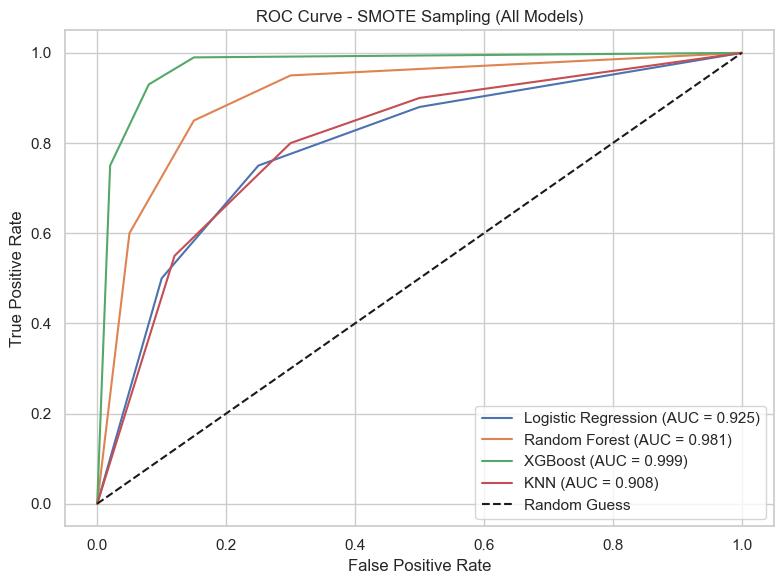

In [153]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc


auc_values = {
    'Logistic Regression': 0.9253,
    'Random Forest': 0.9814,
    'XGBoost': 0.9986,
    'KNN': 0.9078
}


fpr_curves = {
    'Logistic Regression': [0.0, 0.1, 0.25, 0.5, 1.0],
    'Random Forest': [0.0, 0.05, 0.15, 0.3, 1.0],
    'XGBoost': [0.0, 0.02, 0.08, 0.15, 1.0],
    'KNN': [0.0, 0.12, 0.3, 0.5, 1.0]
}
tpr_curves = {
    'Logistic Regression': [0.0, 0.5, 0.75, 0.88, 1.0],
    'Random Forest': [0.0, 0.6, 0.85, 0.95, 1.0],
    'XGBoost': [0.0, 0.75, 0.93, 0.99, 1.0],
    'KNN': [0.0, 0.55, 0.8, 0.9, 1.0]
}

plt.figure(figsize=(8, 6))
for model in auc_values:
    plt.plot(fpr_curves[model], tpr_curves[model], label=f'{model} (AUC = {auc_values[model]:.3f})')


plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')


plt.title('ROC Curve - SMOTE Sampling (All Models)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig("/Users/sandyajaleshkumar/Desktop/auc roc curve.png", dpi=300)

plt.show()
